# Actividad 1
-----------------------

Alumno: Gonzalo Antonio Delgado Rubio

Curso: 06MBID_04_B_2024-25_Estadística avanzada

Seguro de viaje con el atributo objetivo de: Estado del reclamo (Sí o No)



| Atributo Ingles      | Atributo Español       | Significado                                          |
|-----------------------------|-----------------------------|------------------------------------------------------------|
| Claim                       | Estado del reclamo           | Claim Status                                               |
| Agency                      | Nombre de la agencia         | Agency Name                                                |
| Agency Type                 | Tipo de agencias de seguros  | Type of Insurance Agency                                   |
| Distribution Channel        | Canal de distribución        | Distribution Channel of Insurance Agency                    |
| Product Name                | Nombre de los productos      | Name of the Insurance Product                              |
| Duration                    | Duración del viaje           | Duration of the Trip                                       |
| Destination                 | Destino del viaje            | Destination of the Trip                                    |
| Net Sales                   | Monto de ventas              | Net Sales of Insurance Policies                            |
| Commision (in value)        | Comisión recibida            | Commission Received by Insurance Agency                     |
| Gender                      | Género del asegurado         | Gender of the Insured                                      |
| Age                         | Edad del asegurado           | Age of the Insured                                         |


URL DataSet:  https://www.kaggle.com/datasets/mhdzahier/travel-insurance/data

In [309]:
# Instalar y cargar las librerías necesarias
install.packages("caret")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("psych")
library(psych)
library(caret)
library(dplyr)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [310]:
# carga de dataset
df <- read.csv("dataset.csv")
head(df,1)

,ID,Age,Agency,Agency.Type,Commision..in.value.,Destination,Distribution.Channel,Duration,Gender,Net.Sales,Product.Name,Claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1


In [311]:
dim(df)

[1] 62288    12

## 1. Exploración Inicial

In [312]:
# Renombrar las columnas utilizando la función rename de dplyr

df <- df %>% rename(
  id = ID,
  age = Age,
  agency = Agency,
  agency_type = `Agency.Type`,
  commision = `Commision..in.value.`,
  destination = Destination,
  distribution_channel = `Distribution.Channel`,
  duration = Duration,
  gender = Gender,
  net_sales = `Net.Sales`,
  product_name = `Product.Name`,
  claim = Claim
)

# Mostrar las primeras 2 filas del DataFrame
head(df, 2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


In [313]:

# Obtener estadísticas descriptivas de todas las columnas
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,62288,3.284495e+04,1.806542e+04,33446.50,3.308708e+04,22892.826600,0,63323.00,63323.00,-0.09030053,-1.1633701,7.238454e+01
age,2,62288,3.966632e+01,1.401465e+01,36.00,3.769584e+01,7.413000,0,118.00,118.00,2.86558337,12.4269866,5.615393e-02
agency*,3,62288,7.200729e+00,2.674967e+00,8.00,7.164513e+00,1.482600,1,16.00,15.00,-0.07415869,0.3235035,1.071806e-02
agency_type*,4,62288,1.655279e+00,4.752811e-01,2.00,1.694092e+00,0.000000,1,2.00,1.00,-0.65340786,-1.5730834,1.904357e-03
commision,5,62288,1.282970e+01,2.349874e+01,1.88,7.235987e+00,2.787288,0,262.76,262.76,3.36748063,16.5153677,9.415480e-02
destination*,6,62288,6.090452e+01,2.849731e+01,73.00,6.311366e+01,23.721600,1,102.00,101.00,-0.60548286,-0.8625374,1.141831e-01
distribution_channel*,7,62288,1.982083e+00,1.326501e-01,2.00,2.000000e+00,0.000000,1,2.00,1.00,-7.26837803,50.8301352,5.315025e-04
duration,8,62288,6.095880e+01,1.143253e+02,25.00,3.532459e+01,26.686800,-2,4881.00,4883.00,14.86221447,555.5211229,4.580789e-01
gender*,9,62288,1.544920e+00,7.800916e-01,1.00,1.431169e+00,0.000000,1,3.00,2.00,0.98997324,-0.6451385,3.125672e-03


observamos valores negativos para duration y net_sales, de la misma forma age tiene un valor maximo de 118 que podría resultar atipico

### 1.1 Nulidad de Datos

In [314]:
# Calcular la cantidad de valores nulos o vacios para todas las columnas de datos
porcentaje_nulos <- colSums(is.na(df) | df == "") / nrow(df) * 100

# a DF
porcentaje_nulos_df <- data.frame(Columna = names(porcentaje_nulos), Porcentaje_Nulos = porcentaje_nulos)
porcentaje_nulos_df

,Columna,Porcentaje_Nulos
,<chr>,<dbl>
id,id,0.00000
age,age,0.00000
agency,agency,0.00000
agency_type,agency_type,0.00000
commision,commision,0.00000
destination,destination,0.00000
distribution_channel,distribution_channel,0.00000
duration,duration,0.00000
gender,gender,63.53551


observamos que variable gender tiene un 63.5% de valores nulos o vacio, se deberá evaluar si esta variable es relevante para los análisis futuros. A primera impresión podria parecer factible eliminarla

In [315]:
# Reemplazo string vacios por NA
df <- df %>%
  mutate(gender = ifelse(gender == "", NA, gender))

head(df,2)


,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


#### 1.2 Quitar Datos Considerados Errores

In [316]:
# Cantidad de datos con valores negativos
cat("Cantidad de datos negativos para net_sales:", sum(df$net_sales < 0), "\n")
cat("Cantidad de datos negativos para duration:", sum(df$duration < 0), "\n")

Cantidad de datos negativos para net_sales: 584 
Cantidad de datos negativos para duration: 4 


In [317]:
# Los datos se duración y net_sales con valores negativos deberian ser eliminados de nuestro dataset al considerarse como datos erroneos
df <- df[df$net_sales >= 0 & df$duration >= 0, ]
head(df)


,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0
3,18233,27,EPX,Travel Agency,0.00,UNITED STATES,Online,28,NA,13.0,Cancellation Plan,0
4,31742,36,EPX,Travel Agency,0.00,SAUDI ARABIA,Online,1,NA,34.0,Cancellation Plan,0
5,14381,26,CWT,Travel Agency,23.76,THAILAND,Online,33,NA,39.6,Rental Vehicle Excess Insurance,0
6,9279,39,CWT,Travel Agency,59.40,AUSTRALIA,Online,78,NA,99.0,Rental Vehicle Excess Insurance,0


#### 1.3 Verificar la existencia de duplicados

In [318]:
# cantidad registros
dim(df)

[1] 61700    12

In [319]:
# identificando duplicados
duplicate_columns <- df[duplicated(df), ]
duplicate_columns <- duplicate_columns[order(names(duplicate_columns))]
head(duplicate_columns, 5)

,age,agency,agency_type,claim,commision,destination,distribution_channel,duration,gender,id,net_sales,product_name
,<int>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<int>,<dbl>,<chr>
291,44,LWC,Travel Agency,1,49.73,FRANCE,Online,31,M,56061,76.5,Single Trip Travel Protect Gold
386,36,EPX,Travel Agency,1,0.00,VIET NAM,Online,19,NA,36469,25.0,2 way Comprehensive Plan
553,25,C2B,Airlines,1,64.80,SINGAPORE,Online,366,F,44757,259.2,Annual Silver Plan
608,24,C2B,Airlines,1,103.00,SINGAPORE,Online,166,M,60771,412.0,Silver Plan
640,26,C2B,Airlines,1,64.80,SINGAPORE,Online,365,F,48460,259.2,Annual Silver Plan


In [320]:
# cantidad de datos duplicados
dim(duplicate_columns)

[1] 11493    12

In [321]:
# data sin duplicados
df_clean <- unique(df)
dim(df_clean)

[1] 50207    12

## 2. Analisis Exploratorio De los Datos (EDA)

En este apartado nos encargaremos de realizar el análisis a las variables categoricas y numericas asi como a nuestro target para visualizar temas de balance

In [322]:
dim(df_clean)

[1] 50207    12

In [323]:

# Obtener estadísticas descriptivas de todas las columnas
describe(df_clean)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
id,1,50207,3.161462e+04,1.828197e+04,31557,31597.750392,23478.4536,21,63323.00,63302.00,0.007738696,-1.1985683,8.159074e+01
age,2,50207,3.990673e+01,1.396943e+01,36,37.912690,5.9304,0,118.00,118.00,2.990224554,13.1659366,6.234426e-02
agency*,3,50207,7.649212e+00,2.387566e+00,8,7.717554,0.0000,1,16.00,15.00,-0.144376246,1.5352747,1.065549e-02
agency_type*,4,50207,1.721294e+00,4.483671e-01,2,1.776608,0.0000,1,2.00,1.00,-0.987090469,-1.0256728,2.001021e-03
commision,5,50207,9.729067e+00,1.976992e+01,0,4.962594,0.0000,0,262.76,262.76,4.060193400,25.0858310,8.823131e-02
destination*,6,50207,5.902613e+01,2.888012e+01,64,60.780218,37.0650,1,102.00,101.00,-0.448271308,-1.0125404,1.288893e-01
distribution_channel*,7,50207,1.982373e+00,1.315928e-01,2,2.000000,0.0000,1,2.00,1.00,-7.331153059,51.7468358,5.872863e-04
duration,8,50207,4.934947e+01,1.041308e+02,22,30.819155,23.7216,0,4881.00,4881.00,23.397450277,1010.1142402,4.647259e-01
gender*,9,14637,1.514245e+00,4.998141e-01,2,1.517804,0.0000,1,2.00,1.00,-0.056996185,-1.9968878,4.131260e-03


#### 2.1 Validando Distribución Clase Objetivo Claim

In [324]:
df_clean %>%
    group_by(claim) %>%
    summarise(count = n()) %>%
    mutate(proportion = round(count / nrow(df_clean), 4))

claim,count,proportion
<int>,<int>,<dbl>
0,49284,0.9816
1,923,0.0184


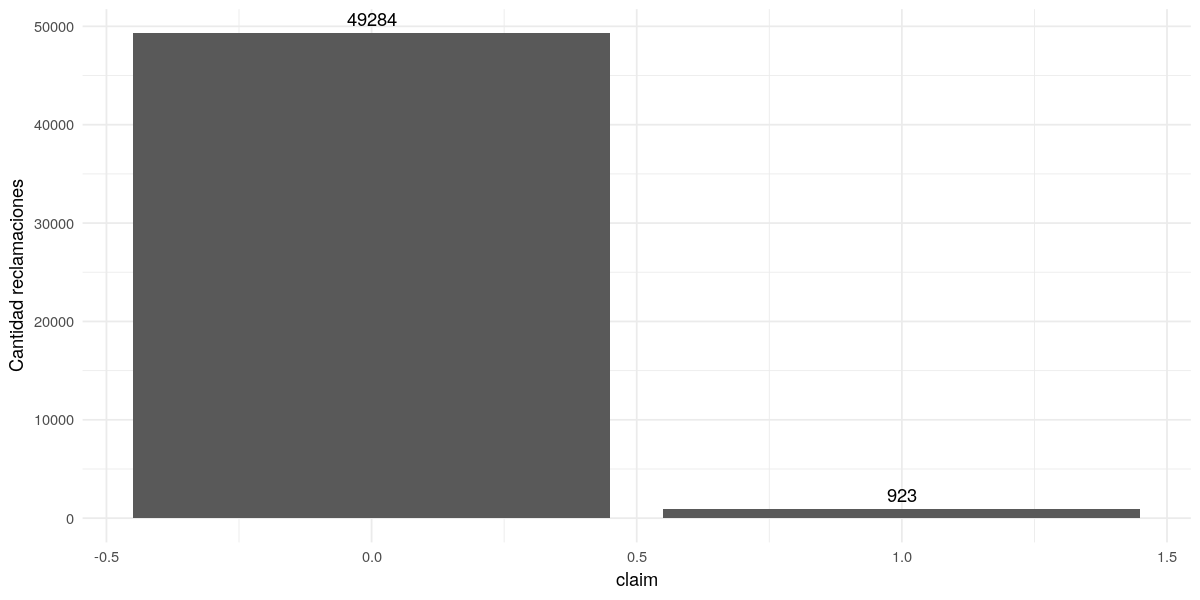

In [325]:
# grafico barras para clase target

ggplot(df_clean, aes(x = claim)) +
    geom_bar() +
    theme_minimal() +
    labs(y = "Cantidad reclamaciones") +
    geom_text(stat = 'count', aes(label = ..count..), vjust = -0.5)

Las reclamaciones de seguros de viaje de la mayoría de los clientes fueron rechazadas por las agencias de seguros. Sólo se aceptó un número mínimo de reclamaciones de seguros. Esto sugiere que se trata de un conjunto de datos muy desequilibrado que debe equilibrarse más adelante para garantizar que no afecte negativamente al rendimiento de los algoritmos de aprendizaje automático.

In [326]:
head(df_clean,2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0


### 2.2 Identificación de tipos de Variables

De acuerdo a la exploración del datset podemos distinguir a las variables numéricas y categóricas según las columnas

In [327]:
# Identificar variables numéricas
variables_numericas <- c('age', 'commision', 'duration', 'net_sales')

# Identificar variables categóricas  -- 'gender' no se incluye dado que se descartó en el análisis
variables_categoricas <- c('agency', 'agency_type', 'destination', 'distribution_channel', 'product_name', 'gender')

# Imprimir las listas
print("Variables numéricas:")
print(variables_numericas)
print("Variables categóricas:")
print(variables_categoricas)


[1] "Variables numéricas:"
[1] "age"       "commision" "duration"  "net_sales"
[1] "Variables categóricas:"
[1] "agency"               "agency_type"          "destination"         
[4] "distribution_channel" "product_name"         "gender"              


#### 2.2.1 Exploración atributos numericos

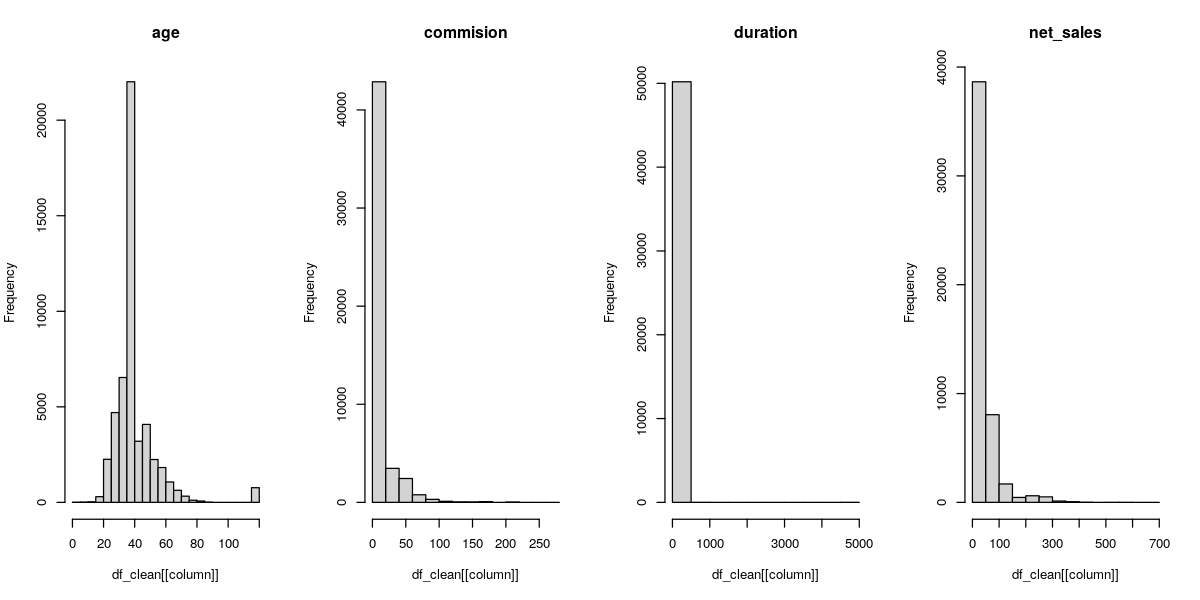

In [328]:
# Ampliar la salida de la imagen para Jupyter Notebook
options(repr.plot.width = 10, repr.plot.height = 5)

# Creando un histograma para cada variable numérica
par(mfrow = c(1, length(variables_numericas)))
for (column in variables_numericas) {
    hist(df_clean[[column]], main = column)
}


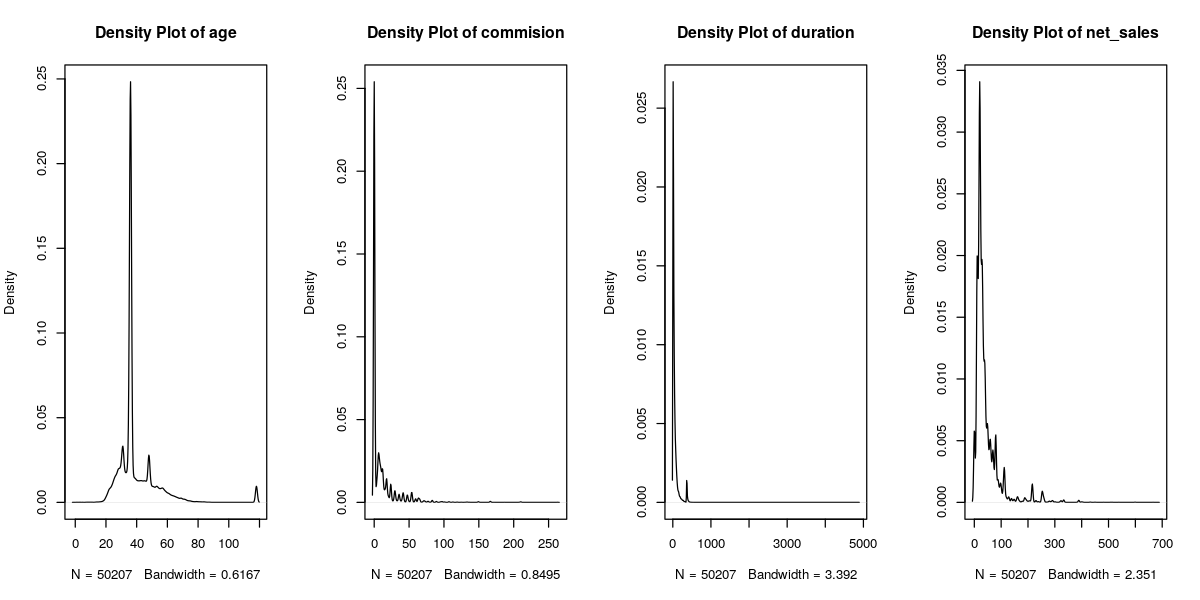

In [329]:
# Obteniendo gráficos de densidad para atributos numéricos
par(mfrow = c(1, length(variables_numericas)))
for (i in 1:length(variables_numericas)) {
    density_plot <- density(df_clean[[variables_numericas[i]]])
    plot(density_plot, main = paste("Density Plot of", variables_numericas[i]))
}

Observamos que para todas nuestras variables la data no se encontraría correctamente distribuida por lo que se entendería que existen muchos valores atipicos.

La variable que tendría mejor distribución seria el de edad

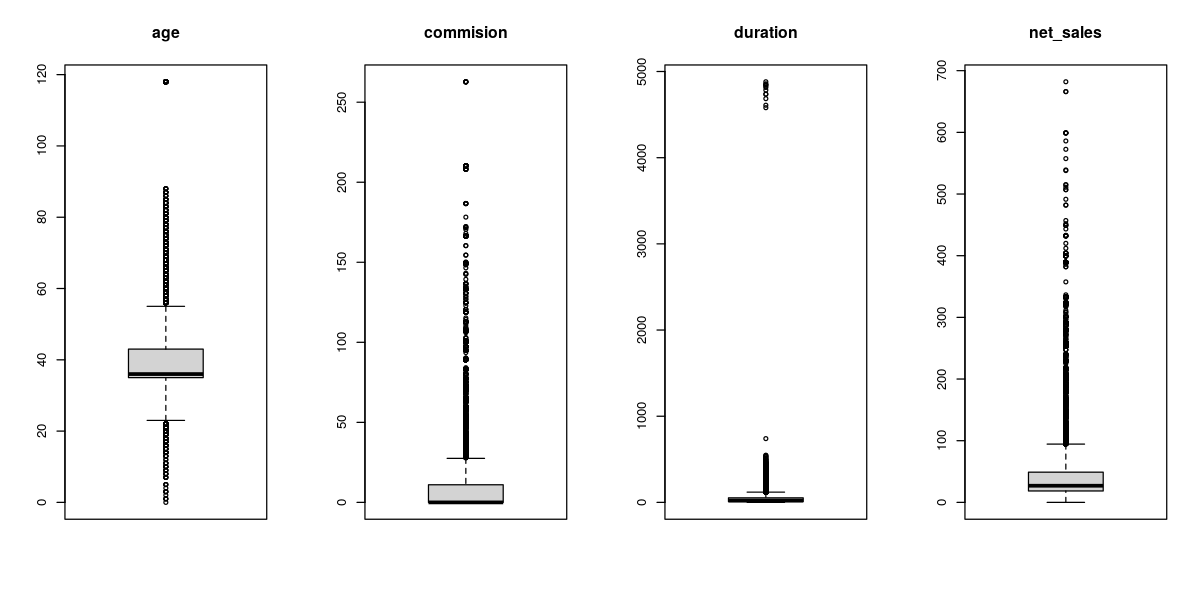

In [330]:
# Crear graficos de caja para atributos numericos
# Crear gráficos de caja para atributos numéricos
par(mfrow = c(1, length(variables_numericas)))
for (i in 1:length(variables_numericas)) {
    boxplot(df_clean[[variables_numericas[i]]], main = variables_numericas[i])
}

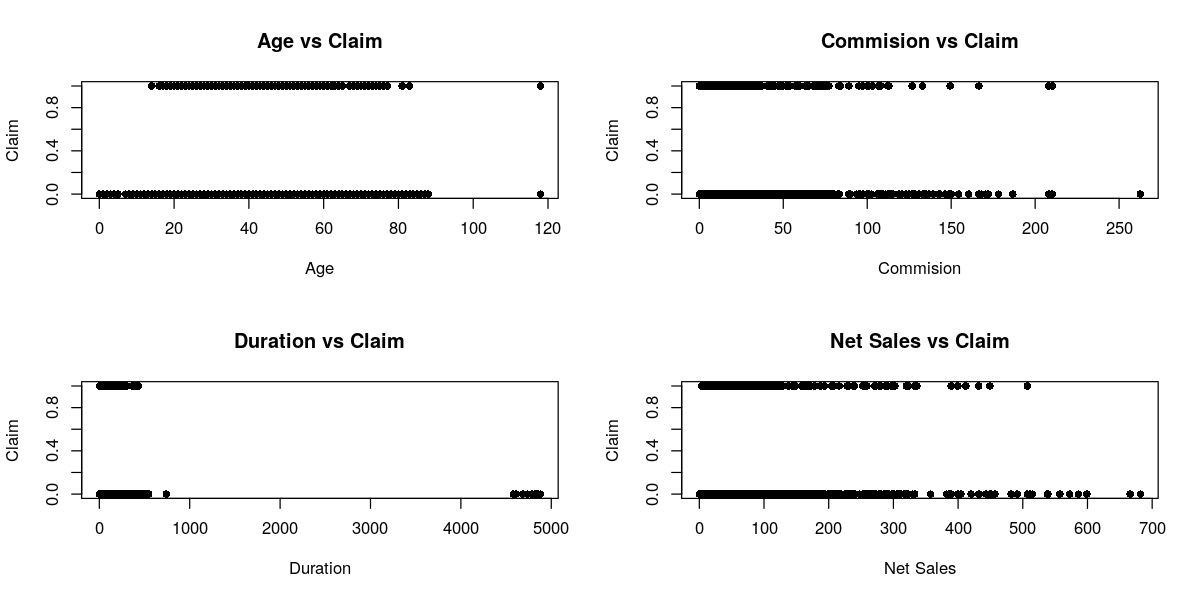

In [331]:
# Create scatter plots for each numeric variable in relation to claim
par(mfrow = c(2, 2))

# Age vs Claim
plot(df_clean$age, df_clean$claim, xlab = "Age", ylab = "Claim", main = "Age vs Claim", pch = 16)

# Commision vs Claim
plot(df_clean$commision, df_clean$claim, xlab = "Commision", ylab = "Claim", main = "Commision vs Claim", pch = 16)

# Duration vs Claim
plot(df_clean$duration, df_clean$claim, xlab = "Duration", ylab = "Claim", main = "Duration vs Claim", pch = 16)

# Net Sales vs Claim
plot(df_clean$net_sales, df_clean$claim, xlab = "Net Sales", ylab = "Claim", main = "Net Sales vs Claim", pch = 16)

# Reset the plot layout
par(mfrow = c(1, 1))

observamos datos fueras de dominio para todos atributos numericos, estos serán tratados más adelante

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



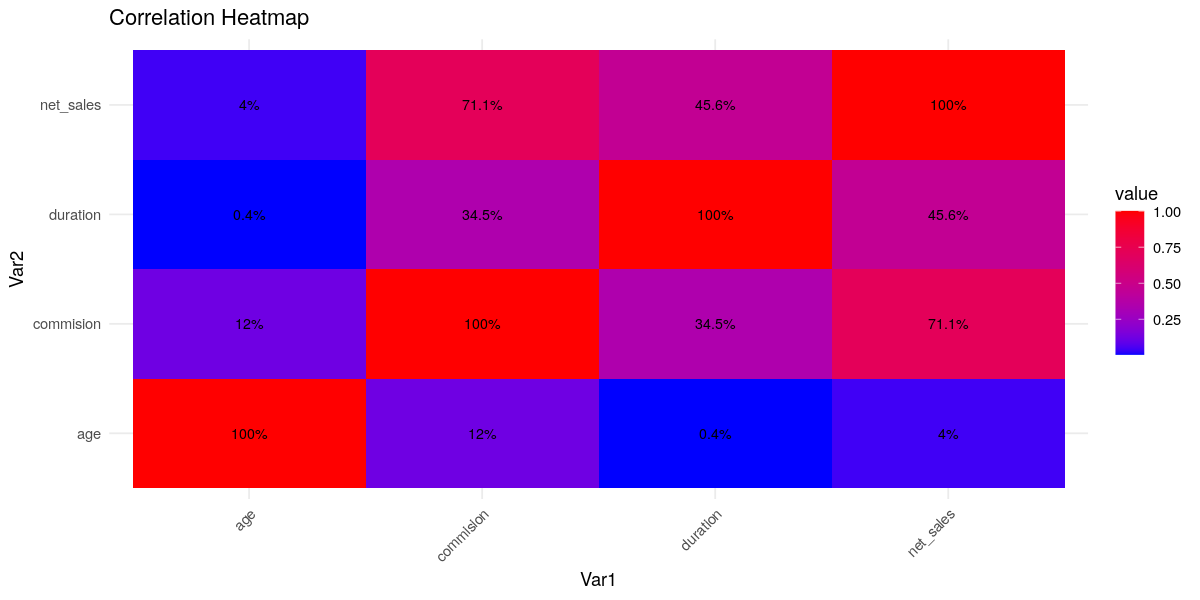

In [332]:
# Instala y carga las librerías necesarias
install.packages("reshape2")
install.packages("ggplot2")
library(reshape2)
library(ggplot2)

# generamos mapa de calor para conocer correlación entre las variables
correlation_matrix <- cor(df_clean[variables_numericas])
melted_correlation <- melt(correlation_matrix)

ggplot(data = melted_correlation, aes(x = Var1, y = Var2, fill = value)) +
    geom_tile() +
    scale_fill_gradient(low = "blue", high = "red") +
    labs(title = "Correlation Heatmap") +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
    geom_text(aes(label = paste0(round(value * 100, 1), "%")), color = "black", size = 3)

observamos correlación positiva entre los datos de net_sales y commision

#### 2.2.2 Exploración atributos Categoricos

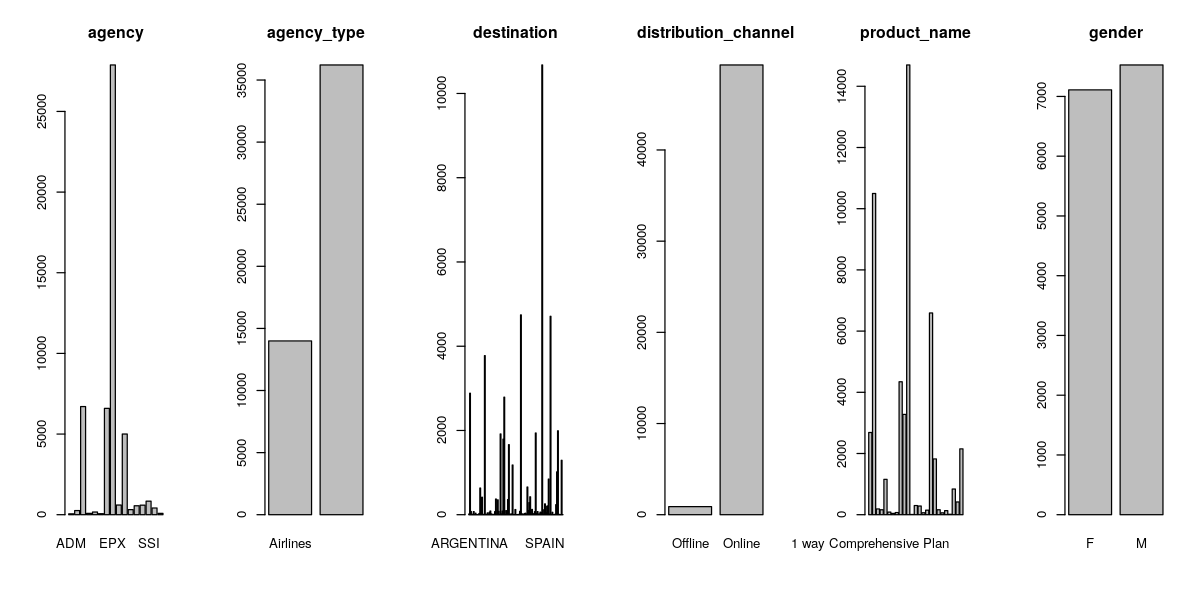

In [333]:
# Crear graficos por cada atributo categórico
# Create plots for each categorical attribute
par(mfrow = c(1, length(variables_categoricas)))
for (i in 1:length(variables_categoricas)) {
    barplot(table(df_clean[[variables_categoricas[i]]]), main = variables_categoricas[i])
}


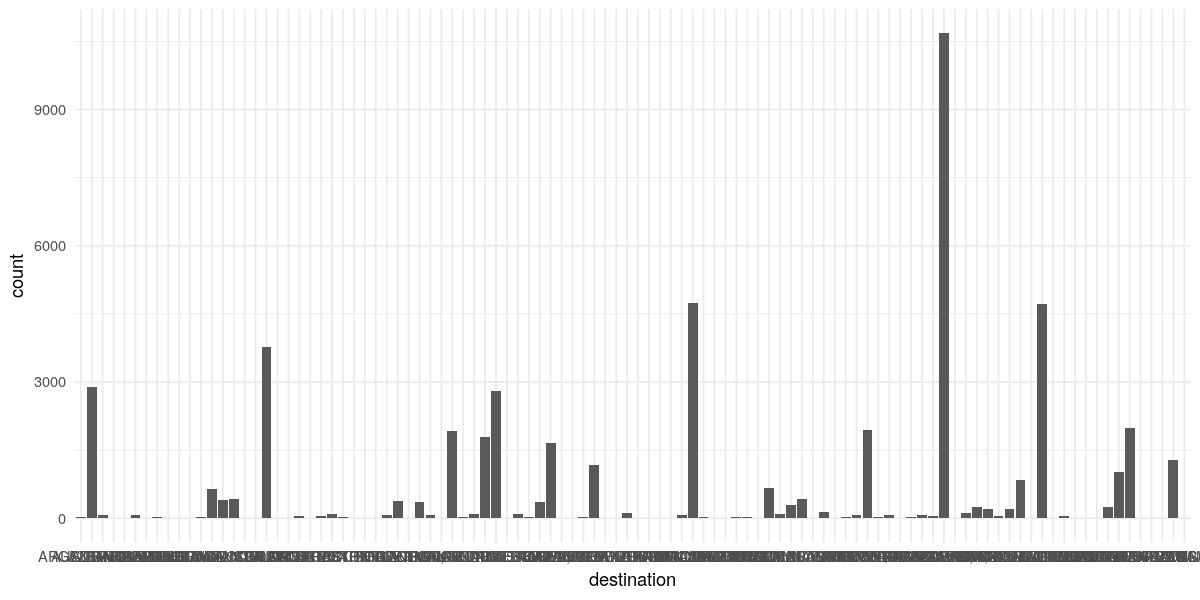

In [334]:
# ampliando vista agencias
library(ggplot2)

ggplot(df_clean, aes(x = destination)) +
    geom_bar() +
    theme_minimal()

Se observa que agency_type preferida es agencia de viajes, se prefiere canal de distribusión online. Para el resto de variables se explorará a detalle

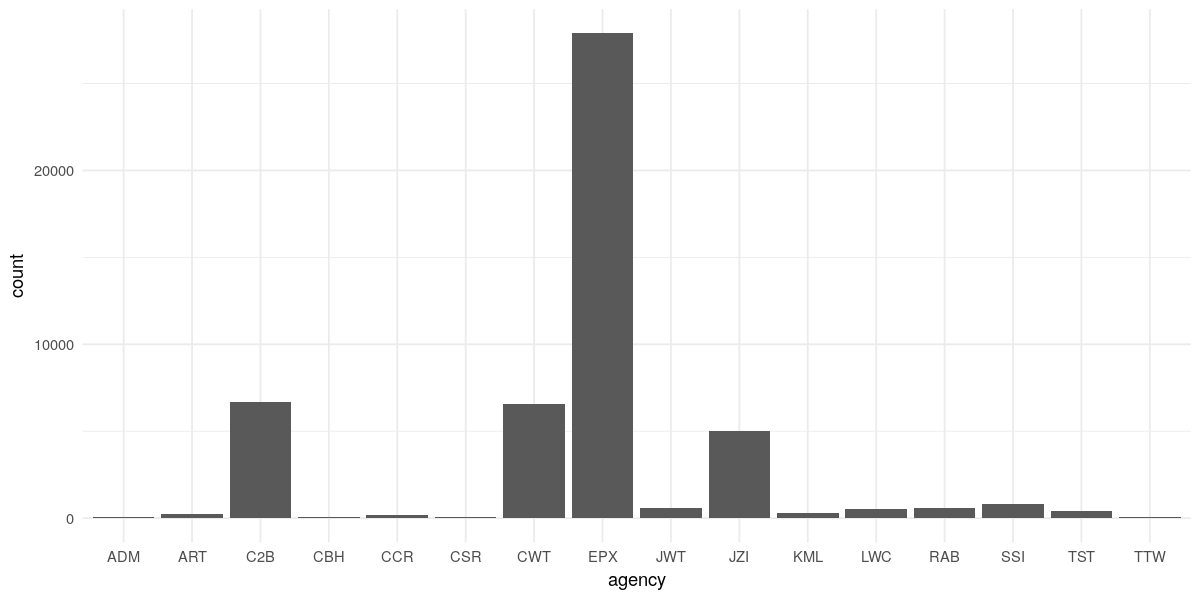

In [335]:
# ampliando vista agencias
library(ggplot2)

ggplot(df_clean, aes(x = agency)) +
    geom_bar() +
    theme_minimal()

agencia con mayor numero de reclamos EPX

In [336]:
netsales_mean <- df_clean %>%
    group_by(agency) %>%
    summarise(net_sales_mean = mean(net_sales)) %>%
    arrange(desc(net_sales_mean)) %>%
    head(10)

netsales_mean

agency,net_sales_mean
<chr>,<dbl>
LWC,114.31315
TTW,93.02353
ADM,85.18519
C2B,80.37781
KML,56.53165
JWT,54.45910
CWT,47.64976
EPX,32.89674
JZI,32.57186


In [337]:
# Generaré variable categorica en base a destination según riesgo de reclamo

df_clean$destination_category <- ifelse(df_clean$destination >= 0.3, "(1) High Risk - Claim > 30%",
                                        ifelse(df_clean$destination >= 0.2, "(2) Medium Risk - Claim > 20%",
                                               ifelse(df_clean$destination > 0, "(3) Low Risk - Claim > 1%", "(4) No Claim")))

head(df_clean, 2)


,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim,destination_category
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<chr>,<int>,<chr>
1,45341,28,C2B,Airlines,28.13,SINGAPORE,Online,34,F,112.5,Silver Plan,1,(1) High Risk - Claim > 30%
2,12958,37,JZI,Airlines,12.95,PHILIPPINES,Online,53,F,37.0,Basic Plan,0,(1) High Risk - Claim > 30%


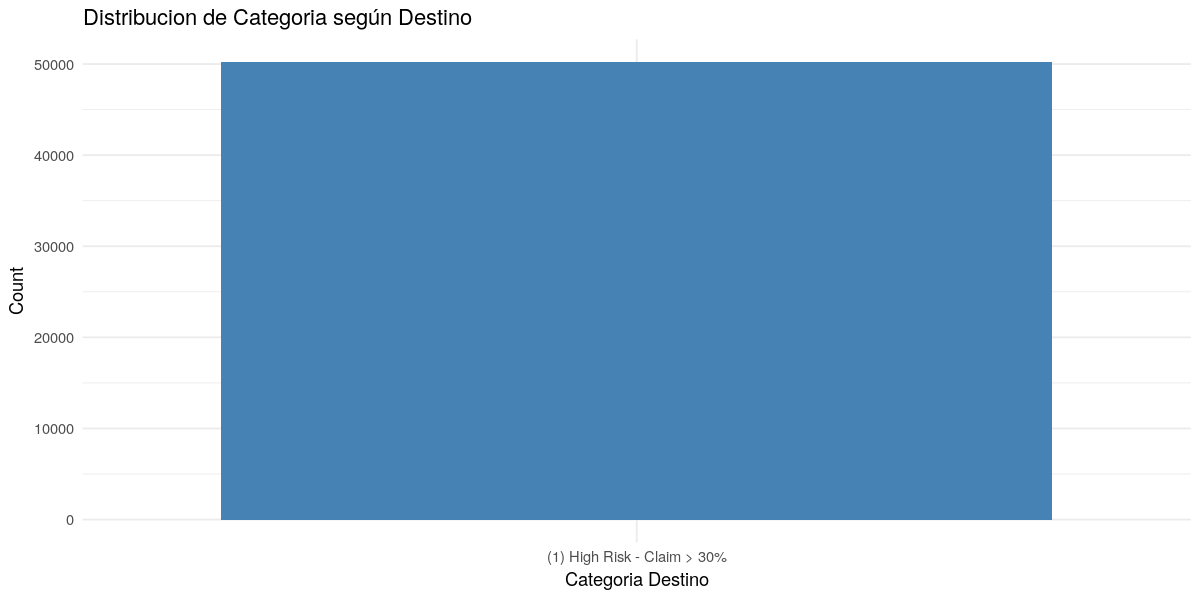

In [338]:
# Ampliando vista de categoría de destino
ggplot(df_clean, aes(x = destination_category)) +
    geom_bar(fill = "steelblue") +
    theme_minimal() +
    labs(x = "Categoria Destino", y = "Count", title = "Distribucion de Categoria según Destino")


### 2.2.4 Diagrama de Cajas para Variables Categoricas según NetSale

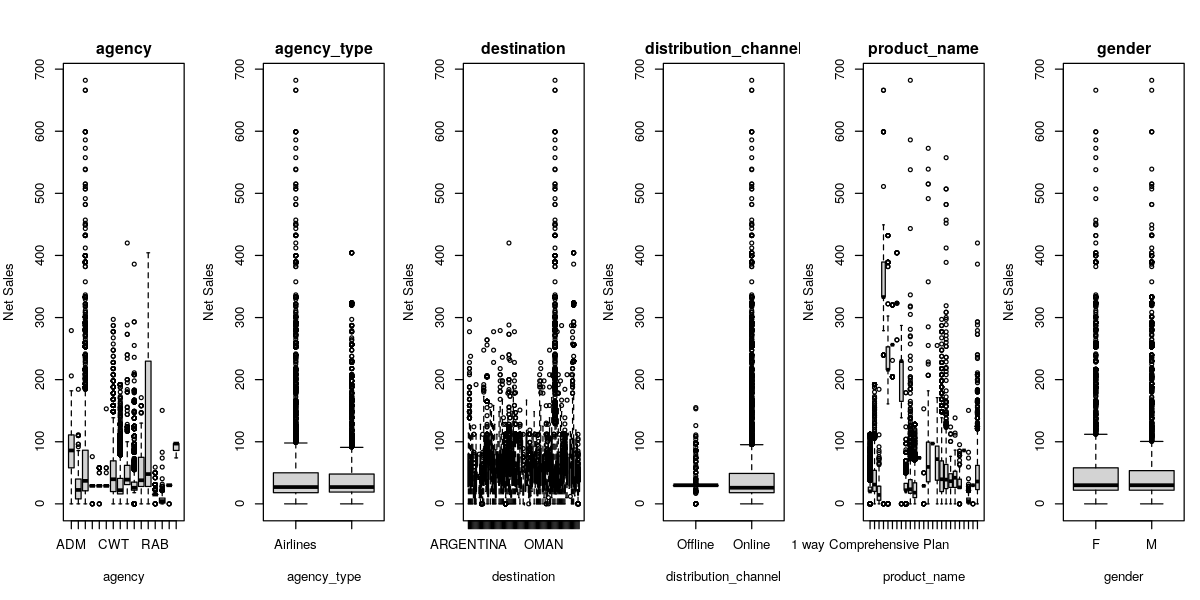

In [339]:
library(ggplot2)

# Create boxplots for each categorical variable
par(mfrow = c(1, length(variables_categoricas)), mar = c(5, 4, 2, 1), oma = c(0, 0, 2, 0))

for (i in 1:length(variables_categoricas)) {
    column <- variables_categoricas[i]
    boxplot(net_sales ~ df_clean[[column]], data = df_clean, main = column, xlab = column, ylab = "Net Sales")
}

# Adjust spacing between subplots
par(mfrow = c(1, 1))

## 3. Construcción de Features

En este apartado realizaremos las transformaciones necesarias para crear los features correspondientes a cada uno de los modelos que se tiene. La salida final de este seccion serán 3 archivos de features para los modelos de Regesion Linea, Multilineal y Logarítmica

In [340]:
# Numero de outliers para cada variable numerica
outliers <- sapply(concatenated_df[, variables_numericas], function(x) sum(x < quantile(x, 0.25) - 1.5 * IQR(x) | x > quantile(x, 0.75) + 1.5 * IQR(x)))

# Numero de registros por variable
record_count <- sapply(concatenated_df[, variables_numericas], function(x) length(x))

# Calcular el porcentaje
percentage_outliers <- outliers / record_count * 100

outliers_df <- data.frame(Variable = names(outliers), Outliers = outliers, Record_Count = record_count, Percentage_Outliers = percentage_outliers)
outliers_df

,Variable,Outliers,Record_Count,Percentage_Outliers
,<chr>,<int>,<int>,<dbl>
age,age,5844,50207,11.639811
commision,commision,5589,50207,11.131914
duration,duration,4373,50207,8.709941
net_sales,net_sales,4028,50207,8.022786


### 3.1 Tranformaciones a Variables Categóricas

In [341]:
variables_categoricas <- setdiff(variables_categoricas, 'destination')
variables_categoricas <- c(variables_categoricas, 'destination_category')
variables_categoricas

[1] "agency"               "agency_type"          "distribution_channel"
[4] "product_name"         "gender"               "destination_category"

In [342]:
# Instala y carga las librerías necesarias
install.packages("dplyr")
install.packages("caret")
library(dplyr)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



##### 3.1.1 Variables: distribution_channel | agency_type | gender | destination_category_levels

In [343]:
# Definir las categorías para la codificación ordinal
agency_type_levels <- c('Airlines', 'Travel Agency')
distribution_channel_levels <- c('Offline', 'Online')
gender_levels <- c('F', 'M')
destination_category_levels <- c('(1) High Risk - Claim > 30%',
                                 '(2) Medium Risk - Claim > 20%',
                                 '(3) Low Risk - Claim > 1%',
                                 '(4) No Claim')

# Crear una función para la codificación ordinal
ordinal_encode <- function(column, levels) {
  factor(column, levels = levels, ordered = TRUE) %>%
    as.integer()
}

# Aplicar la codificación ordinal a las columnas 'agency_type' y 'distribution_channel'
df_clean <- df_clean %>%
  mutate(
    gender = ordinal_encode(gender, gender_levels),
    agency_type = ordinal_encode(agency_type, agency_type_levels),
    distribution_channel = ordinal_encode(distribution_channel, distribution_channel_levels),
    destination_category = ordinal_encode(destination_category, destination_category_levels)
  )

# Verificar el resultado
head(df_clean,2)

,id,age,agency,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,claim,destination_category
,<int>,<int>,<chr>,<int>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>
1,45341,28,C2B,1,28.13,SINGAPORE,2,34,1,112.5,Silver Plan,1,1
2,12958,37,JZI,1,12.95,PHILIPPINES,2,53,1,37.0,Basic Plan,0,1


#### 3.1.2 Variable: agency

In [344]:
# Crear una función para la codificación one-hot
one_hot_encode <- function(data, column) {
  dummies <- dummyVars(~ ., data = data[, column, drop = FALSE])
  encoded_data <- predict(dummies, newdata = data)
  encoded_df <- as.data.frame(encoded_data)
  return(encoded_df)
}

# Aplicar la codificación one-hot a la columna 'agency'
agencies_encoded_df <- one_hot_encode(df_clean, "agency")

# Verificar el resultado
head(agencies_encoded_df, 1)

,agencyADM,agencyART,agencyC2B,agencyCBH,agencyCCR,agencyCSR,agencyCWT,agencyEPX,agencyJWT,agencyJZI,agencyKML,agencyLWC,agencyRAB,agencySSI,agencyTST,agencyTTW
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [345]:
# Restablecer los índices de ambos data frames
df_clean <- df_clean %>% mutate(row_id = row_number())
agencies_encoded_df <- agencies_encoded_df %>% mutate(row_id = row_number())

# Unir los data frames por el índice
concatenated_df <- df_clean %>%
  inner_join(agencies_encoded_df, by = "row_id") %>%
  select(-row_id)

# Eliminar la columna original 'agency'
concatenated_df <- concatenated_df %>% select(-agency)

# Verificar el resultado
head(concatenated_df,1)

,id,age,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,product_name,⋯,agencyCWT,agencyEPX,agencyJWT,agencyJZI,agencyKML,agencyLWC,agencyRAB,agencySSI,agencyTST,agencyTTW
,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,45341,28,1,28.13,SINGAPORE,2,34,1,112.5,Silver Plan,⋯,0,0,0,0,0,0,0,0,0,0


#### 3.1.3 Variable: product_name

In [346]:

# Aplicar la codificación one-hot a la columna 'product_name'
product_encoder <- one_hot_encode(concatenated_df, "product_name")

# Restablecer los índices del data frame
product_encoder <- product_encoder %>% mutate(row_id = row_number())

# Verificar el resultado
head(product_encoder, 2)

,product_name1 way Comprehensive Plan,product_name2 way Comprehensive Plan,product_name24 Protect,product_nameAnnual Gold Plan,product_nameAnnual Silver Plan,product_nameAnnual Travel Protect Gold,product_nameAnnual Travel Protect Platinum,product_nameAnnual Travel Protect Silver,product_nameBasic Plan,product_nameBronze Plan,⋯,product_nameRental Vehicle Excess Insurance,product_nameSilver Plan,product_nameSingle Trip Travel Protect Gold,product_nameSingle Trip Travel Protect Platinum,product_nameSingle Trip Travel Protect Silver,product_nameSpouse or Parents Comprehensive Plan,product_nameTicket Protector,product_nameTravel Cruise Protect,product_nameValue Plan,row_id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,2


In [347]:
# Restablecer los índices de ambos data frames
concatenated_df <- concatenated_df %>% mutate(row_id = row_number())
product_encoder <- product_encoder %>% mutate(row_id = row_number())

# Unir los data frames por el índice
concatenated_df <- concatenated_df %>%
  inner_join(product_encoder, by = "row_id") %>%
  select(-row_id)

# Eliminar la columna original 'product_name'
concatenated_df <- concatenated_df %>% select(-product_name)

# Verificar si hay valores nulos después de concatenar
head(concatenated_df, 2)

,id,age,agency_type,commision,destination,distribution_channel,duration,gender,net_sales,claim,⋯,product_namePremier Plan,product_nameRental Vehicle Excess Insurance,product_nameSilver Plan,product_nameSingle Trip Travel Protect Gold,product_nameSingle Trip Travel Protect Platinum,product_nameSingle Trip Travel Protect Silver,product_nameSpouse or Parents Comprehensive Plan,product_nameTicket Protector,product_nameTravel Cruise Protect,product_nameValue Plan
,<int>,<int>,<int>,<dbl>,<chr>,<int>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,45341,28,1,28.13,SINGAPORE,2,34,1,112.5,1,⋯,0,0,1,0,0,0,0,0,0,0
2,12958,37,1,12.95,PHILIPPINES,2,53,1,37.0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [348]:
concatenated_df <- concatenated_df[, !(names(concatenated_df) %in% c("destination"))]

#### 3.1.4 Concatenado Final

Tratamiento de Nulos para Variable Genero

In [349]:
# Calcular la moda de la columna 'genero'
moda_genero <- names(sort(table(concatenated_df$gender), decreasing = TRUE))[1]

# Reemplazar los valores NA con la moda
concatenated_df$gender[is.na(concatenated_df$gender)] <- moda_genero

In [350]:
head(concatenated_df,1)

,id,age,agency_type,commision,distribution_channel,duration,gender,net_sales,claim,destination_category,⋯,product_namePremier Plan,product_nameRental Vehicle Excess Insurance,product_nameSilver Plan,product_nameSingle Trip Travel Protect Gold,product_nameSingle Trip Travel Protect Platinum,product_nameSingle Trip Travel Protect Silver,product_nameSpouse or Parents Comprehensive Plan,product_nameTicket Protector,product_nameTravel Cruise Protect,product_nameValue Plan
,<int>,<int>,<int>,<dbl>,<int>,<int>,<chr>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,45341,28,1,28.13,2,34,1,112.5,1,1,⋯,0,0,1,0,0,0,0,0,0,0


In [351]:
dim(concatenated_df)

[1] 50207    51

In [352]:
# limpiando nombres de las columnas
colnames(concatenated_df) <- gsub("\\.|\\s", "", colnames(concatenated_df))

colnames(concatenated_df)


[1] "id"                                          
 [2] "age"                                         
 [3] "agency_type"                                 
 [4] "commision"                                   
 [5] "distribution_channel"                        
 [6] "duration"                                    
 [7] "gender"                                      
 [8] "net_sales"                                   
 [9] "claim"                                       
[10] "destination_category"                        
[11] "agencyADM"                                   
[12] "agencyART"                                   
[13] "agencyC2B"                                   
[14] "agencyCBH"                                   
[15] "agencyCCR"                                   
[16] "agencyCSR"                                   
[17] "agencyCWT"                                   
[18] "agencyEPX"                                   
[19] "agencyJWT"                                   
[20] "agencyJZI"                                   
[21] "agencyKML"                                   
[22] "agencyLWC"                                   
[23] "agencyRAB"                                   
[24] "agencySSI"                                   
[25] "agencyTST"                                   
[26] "agencyTTW"                                   
[27] "product_name1wayComprehensivePlan"           
[28] "product_name2wayComprehensivePlan"           
[29] "product_name24Protect"                       
[30] "product_nameAnnualGoldPlan"                  
[31] "product_nameAnnualSilverPlan"                
[32] "product_nameAnnualTravelProtectGold"         
[33] "product_nameAnnualTravelProtectPlatinum"     
[34] "product_nameAnnualTravelProtectSilver"       
[35] "product_nameBasicPlan"                       
[36] "product_nameBronzePlan"                      
[37] "product_nameCancellationPlan"                
[38] "product_nameChildComprehensivePlan"          
[39] "product_nameComprehensivePlan"               
[40] "product_nameGoldPlan"                        
[41] "product_nameIndividualComprehensivePlan"     
[42] "product_namePremierPlan"                     
[43] "product_nameRentalVehicleExcessInsurance"    
[44] "product_nameSilverPlan"                      
[45] "product_nameSingleTripTravelProtectGold"     
[46] "product_nameSingleTripTravelProtectPlatinum" 
[47] "product_nameSingleTripTravelProtectSilver"   
[48] "product_nameSpouseorParentsComprehensivePlan"
[49] "product_nameTicketProtector"                 
[50] "product_nameTravelCruiseProtect"             
[51] "product_nameValuePlan"

In [353]:
# Check for missing values or empty strings in columns
missing_values <- colSums(is.na(concatenated_df) | concatenated_df == "") > 0

# Get the names of columns with missing values or empty strings
columns_with_missing_values <- names(missing_values[missing_values])

# Print the columns with missing values or empty strings
columns_with_missing_values

character(0)

### 3.2 Construcción de Features Modelo Regresión Lineal

In [412]:
features_regresion_df <- concatenated_df[, c('id', 'commision', 'net_sales')]
head(features_regresion_df,1)

,id,commision,net_sales
,<int>,<dbl>,<dbl>
1,45341,28.13,112.5


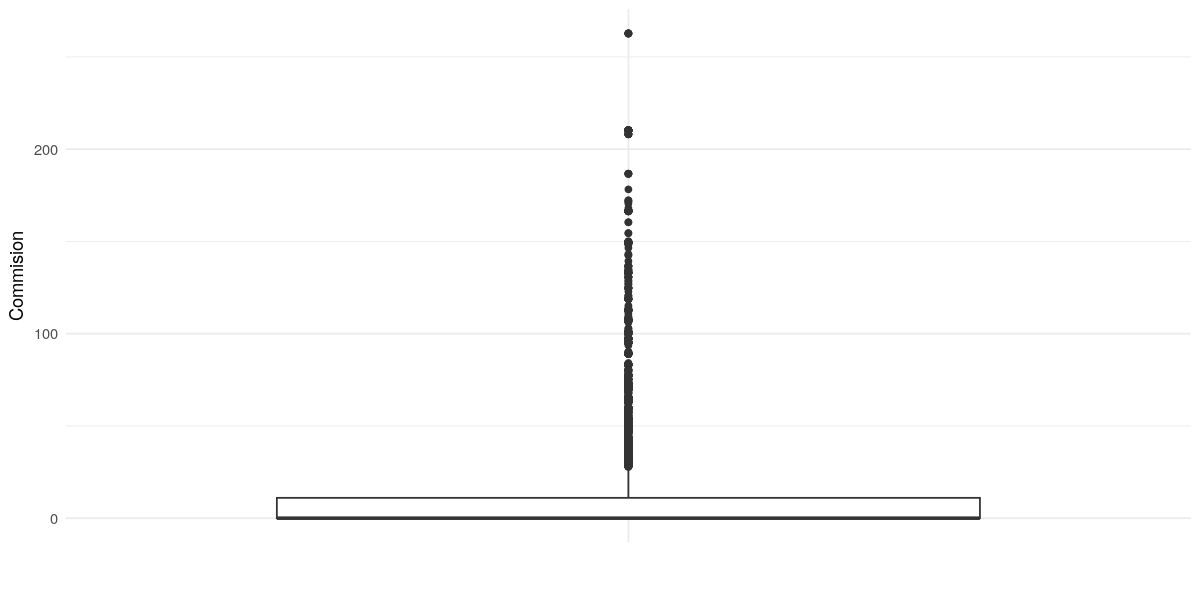

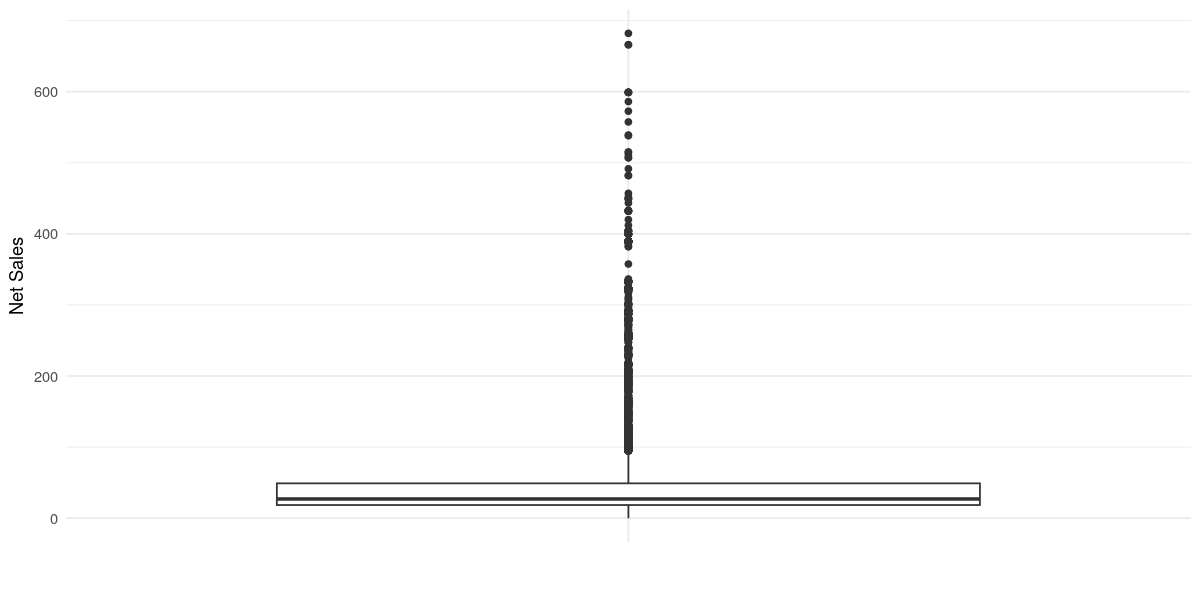

In [413]:
# Create a boxplot for 'commision'
ggplot(features_regresion_df, aes(x = "", y = commision)) +
    geom_boxplot() +
    labs(x = "", y = "Commision") +
    theme_minimal()

# Create a boxplot for 'net_sales'
ggplot(features_regresion_df, aes(x = "", y = net_sales)) +
    geom_boxplot() +
    labs(x = "", y = "Net Sales") +
    theme_minimal()

In [414]:
# rango intercuartil para tratamiento de outliers
tratamiento_outlier <- function(data, col) {
    lower_limit <- quantile(data[col], 0.25)
    upper_limit <- quantile(data[col], 0.75)
    # Calculo Rango intercuartil
    IQR <- upper_limit - lower_limit
    # Definiendo los whiskers
    lower_whisker <- lower_limit - 1.5 * IQR
    upper_whisker <- upper_limit + 1.5 * IQR
    return(ifelse(data[col] > upper_whisker, upper_whisker, ifelse(data[col] < lower_whisker, lower_whisker, data[col])))
}

In [415]:

# Aplicando Winsorization a 'commision' and 'net_sales'
features_regresion_df$commision <- tratamiento_outlier(features_regresion_df$commision)
features_regresion_df$net_sales <- tratamiento_outlier(features_regresion_df$net_sales)

# Verificar el resultado
head(features_regresion_df)

,id,commision,net_sales
,<int>,<dbl>,<dbl>
1,45341,27.55,94.75
2,12958,12.95,37.00
3,18233,0.00,13.00
4,31742,0.00,34.00
5,14381,23.76,39.60
6,9279,27.55,94.75


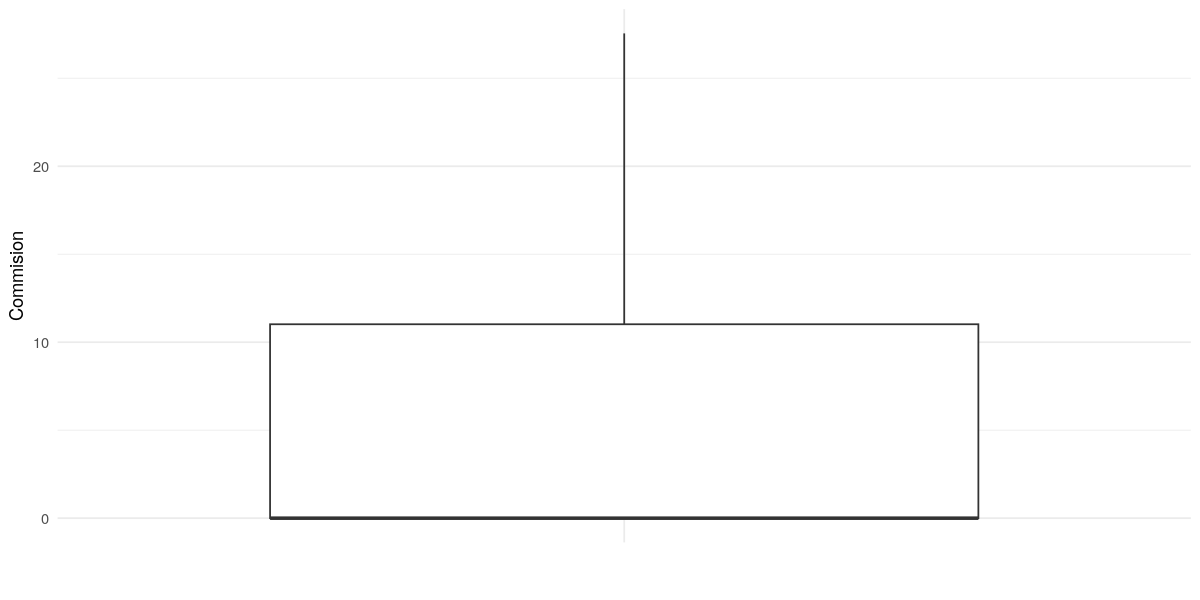

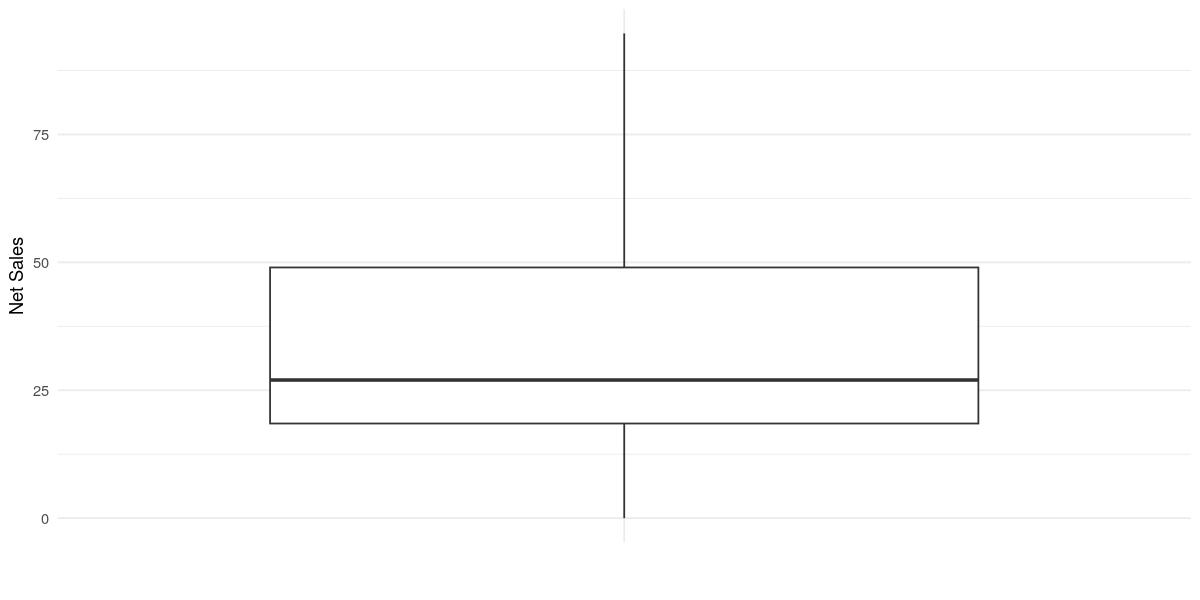

In [416]:
# Create a boxplot for 'commision'
ggplot(features_regresion_df, aes(x = "", y = commision)) +
    geom_boxplot() +
    labs(x = "", y = "Commision") +
    theme_minimal()

# Create a boxplot for 'net_sales'
ggplot(features_regresion_df, aes(x = "", y = net_sales)) +
    geom_boxplot() +
    labs(x = "", y = "Net Sales") +
    theme_minimal()

In [417]:
write.csv(features_regresion_df, "feature_regresion_lineal.csv", row.names = FALSE)

### 3.3 Construcción de Features Modelo Regresión Multilineal

In [360]:
features_regresion_multiple_df <- data.frame(concatenated_df)

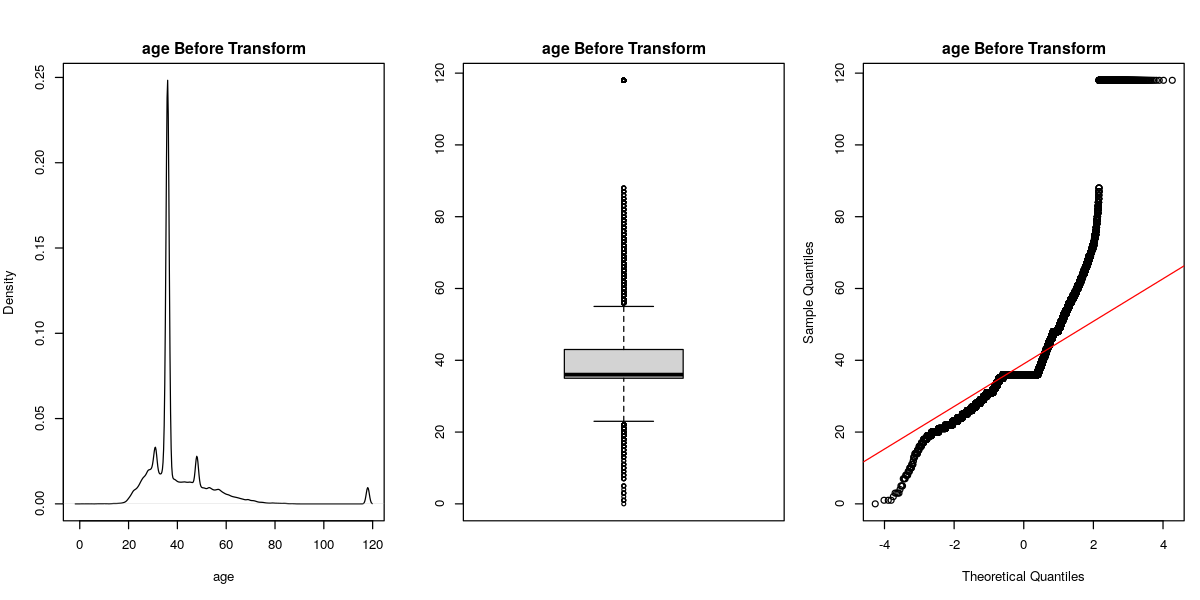

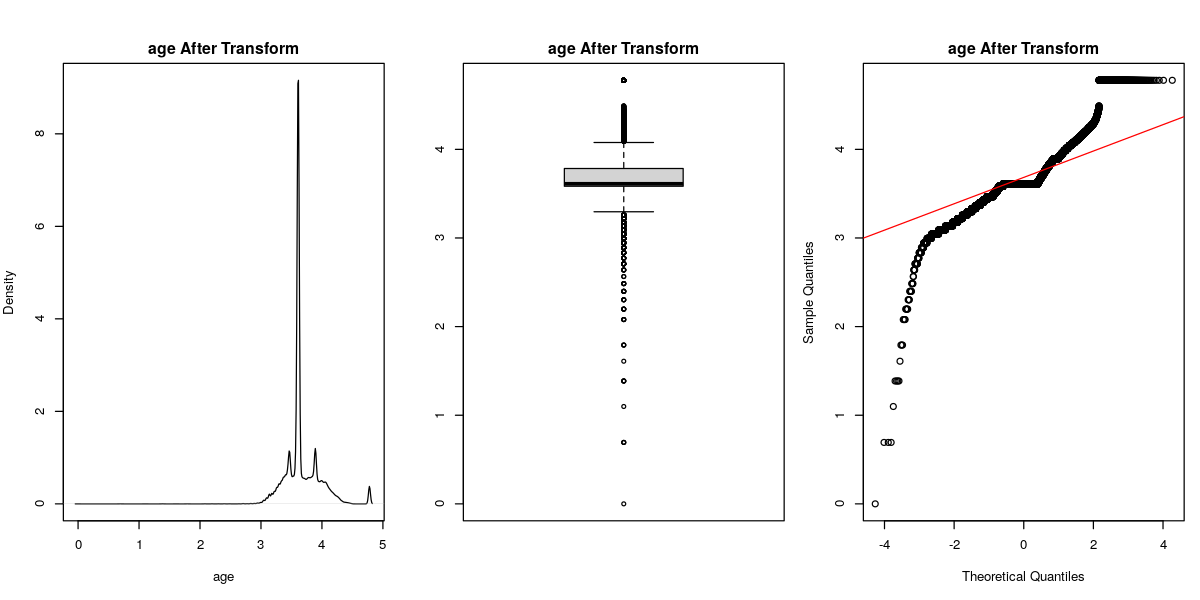

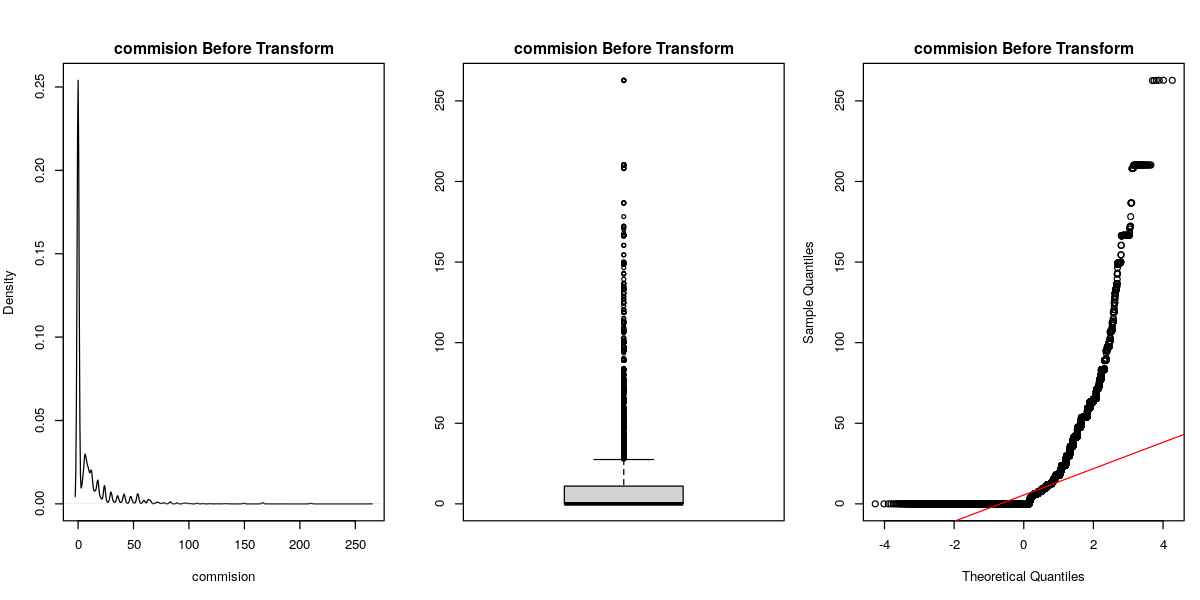

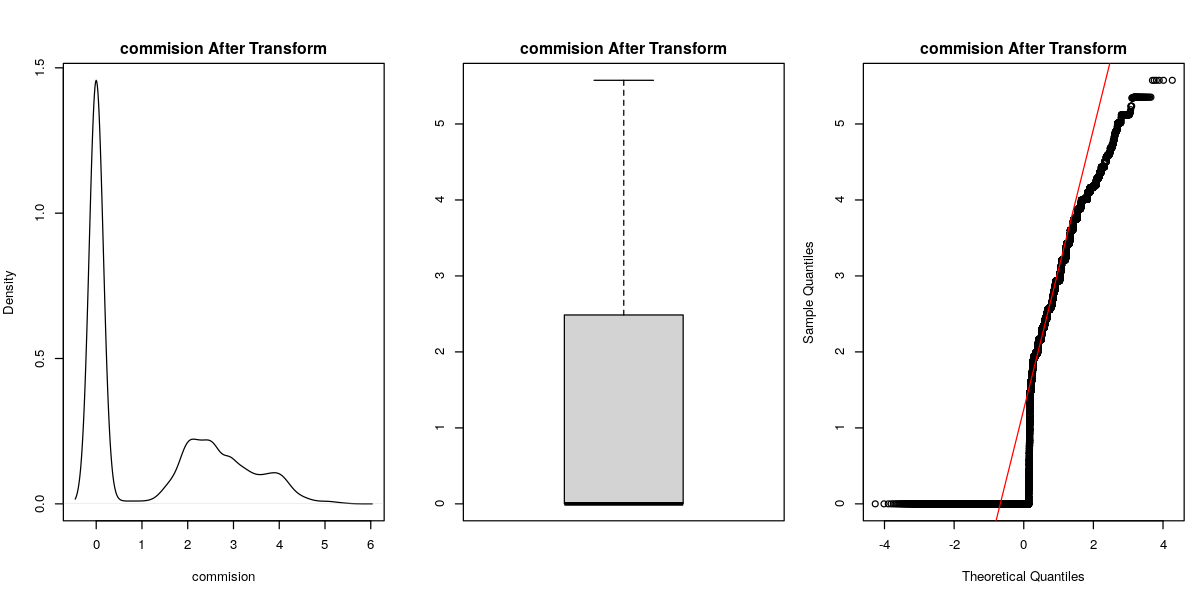

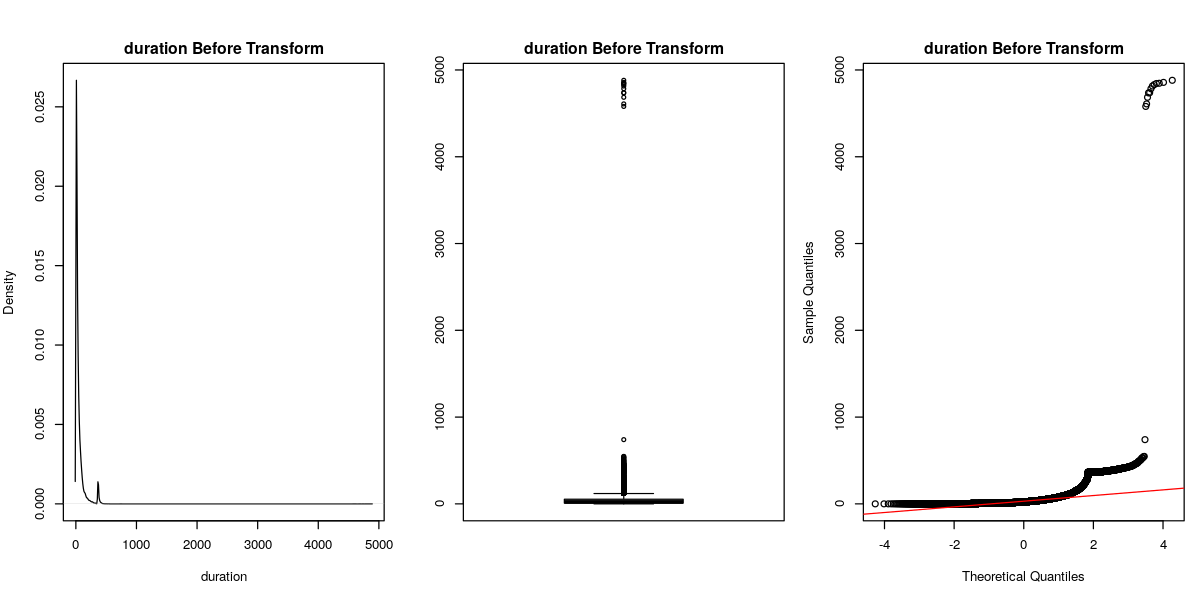

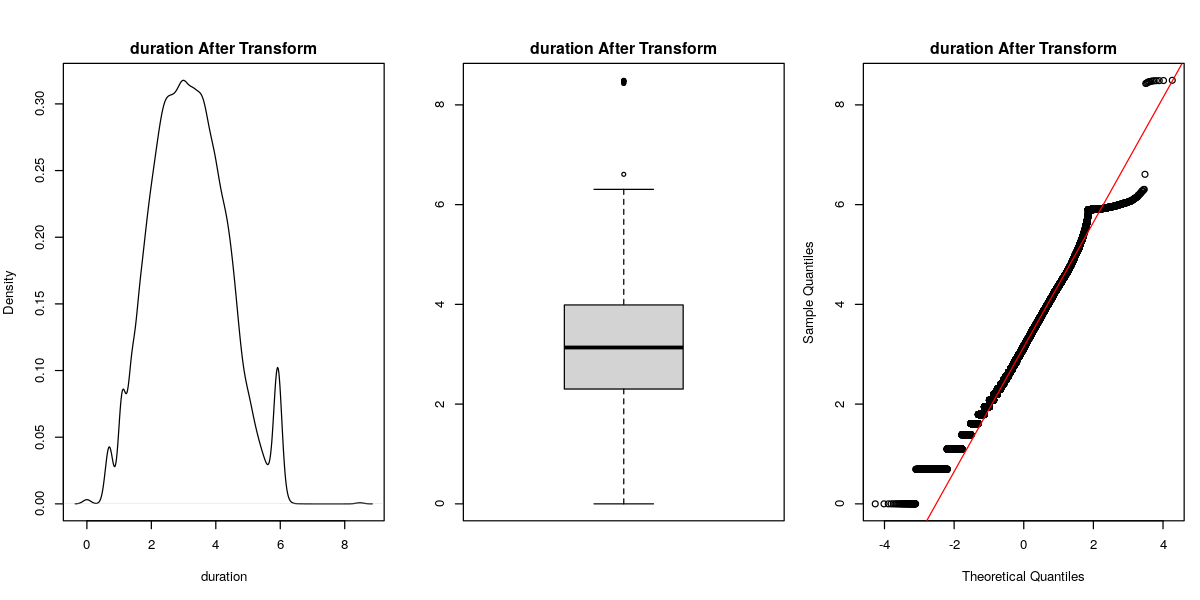

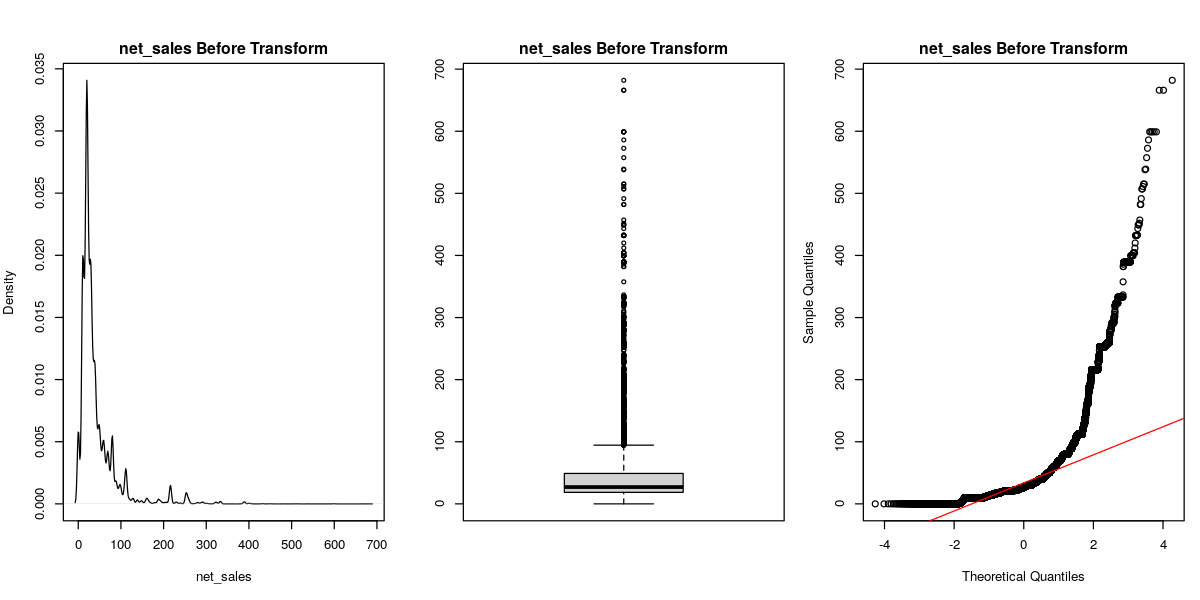

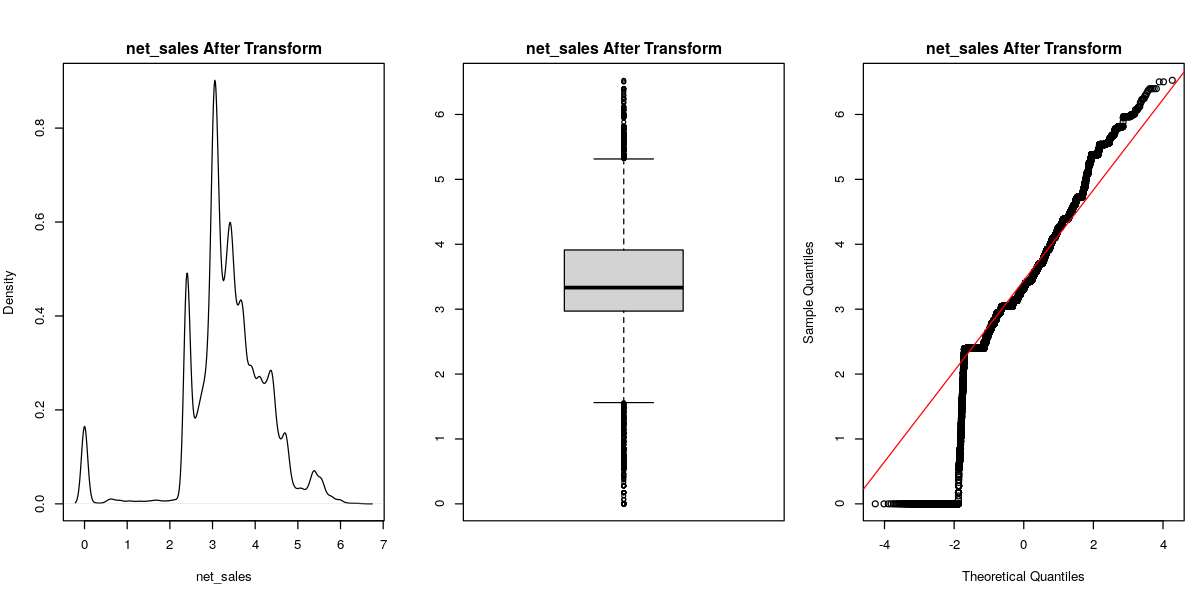

In [361]:
# Definir la función de transformación logarítmica
log_transform <- function(x) {
    return(log1p(x))
}

# Función para aplicar la transformación y graficar
apply_transform <- function(transformer, col, df) {
    par(mfrow = c(1, 3), mar = c(5, 4, 2, 1), oma = c(0, 0, 2, 0))
    
    # Antes de la transformación
    plot(density(df[[col]]), main = paste(col, "Before Transform"), xlab = col)
    boxplot(df[[col]], main = paste(col, "Before Transform"))
    qqnorm(df[[col]], main = paste(col, "Before Transform"))
    qqline(df[[col]], col = "red")
    
    # Aplicar la transformación
    col_tf <- transformer(df[[col]])
    
    # Después de la transformación
    plot(density(col_tf), main = paste(col, "After Transform"), xlab = col)
    boxplot(col_tf, main = paste(col, "After Transform"))
    qqnorm(col_tf, main = paste(col, "After Transform"))
    qqline(col_tf, col = "red")
    
    par(mfrow = c(1, 1))
}

# Crear el transformador logarítmico
log_transformer <- log_transform

# Observar la transformación
for (column in variables_numericas) {
    apply_transform(log_transformer, column, features_regresion_multiple_df)
}

In [362]:
# Dada la mejoría luego de aplicar la transformación logarítmica, se procederá a aplicarla a las variables numéricas


# Aplicar la transformación logarítmica a cada columna en variables_numericas
for (col in variables_numericas) {
    col_tf <- log_transformer(features_regresion_multiple_df[[col]])
    features_regresion_multiple_df[[col]] <- col_tf
}

# Verificar el resultado
head(features_regresion_multiple_df,2)

,id,age,agency_type,commision,distribution_channel,duration,gender,net_sales,claim,destination_category,⋯,product_namePremierPlan,product_nameRentalVehicleExcessInsurance,product_nameSilverPlan,product_nameSingleTripTravelProtectGold,product_nameSingleTripTravelProtectPlatinum,product_nameSingleTripTravelProtectSilver,product_nameSpouseorParentsComprehensivePlan,product_nameTicketProtector,product_nameTravelCruiseProtect,product_nameValuePlan
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,45341,3.367296,1,3.371769,2,3.555348,1,4.731803,1,1,⋯,0,0,1,0,0,0,0,0,0,0
2,12958,3.637586,1,2.635480,2,3.988984,1,3.637586,0,1,⋯,0,0,0,0,0,0,0,0,0,0


In [363]:
# rango intercuartil para tratamiento de outliers
tratamiento_outlier <- function(data, col) {
    lower_limit <- quantile(data[col], 0.25)
    upper_limit <- quantile(data[col], 0.75)
    # Calculo Rango intercuartil
    IQR <- upper_limit - lower_limit
    # Definiendo los whiskers
    lower_whisker <- lower_limit - 1.5 * IQR
    upper_whisker <- upper_limit + 1.5 * IQR
    return(ifelse(data[col] > upper_whisker, upper_whisker, ifelse(data[col] < lower_whisker, lower_whisker, data[col])))
}


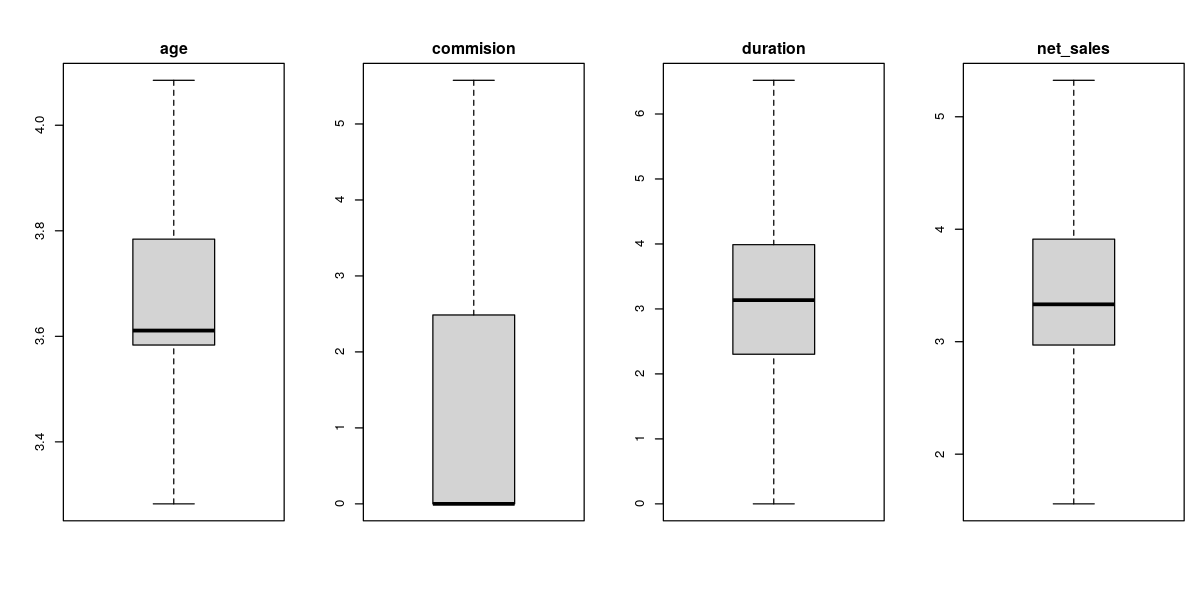

In [364]:

# Crear gráficos de caja para atributos numéricos
par(mfrow = c(1, length(variables_numericas)), mar = c(5, 4, 2, 1), oma = c(0, 0, 2, 0))

# Generar diagramas de caja luego del tratamiento de outliers
for (i in 1:length(variables_numericas)) {
    column <- variables_numericas[i]
    boxplot(tratamiento_outlier(features_regresion_multiple_df[[column]]), main = column)
}

# Ajustar el espaciado entre subgráficos
par(mfrow = c(1, 1))

In [365]:
for (col in variables_numericas) {
    features_regresion_multiple_df[[col]] <- tratamiento_outlier(features_regresion_multiple_df[[col]])
}

head(features_regresion_multiple_df,2)

,id,age,agency_type,commision,distribution_channel,duration,gender,net_sales,claim,destination_category,⋯,product_namePremierPlan,product_nameRentalVehicleExcessInsurance,product_nameSilverPlan,product_nameSingleTripTravelProtectGold,product_nameSingleTripTravelProtectPlatinum,product_nameSingleTripTravelProtectSilver,product_nameSpouseorParentsComprehensivePlan,product_nameTicketProtector,product_nameTravelCruiseProtect,product_nameValuePlan
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,45341,3.367296,1,3.371769,2,3.555348,1,4.731803,1,1,⋯,0,0,1,0,0,0,0,0,0,0
2,12958,3.637586,1,2.635480,2,3.988984,1,3.637586,0,1,⋯,0,0,0,0,0,0,0,0,0,0


In [366]:
write.csv(features_regresion_multiple_df, "feature_regresion_lineal_multiple.csv", row.names = FALSE)

### 3.4 Construcción de Features Modelo Regresión Logarítmica

In [396]:
features_regresion_logaritmica_df <- data.frame(features_regresion_multiple_df)

Balanceo de Variable Target

In [430]:
# Instalar y cargar las librerías necesarias
install.packages("smotefamily")
library(smotefamily)

# Separar las características (X) y la variable objetivo (y)
X <- features_regresion_logaritmica_df[, !names(features_regresion_logaritmica_df) %in% "claim"]
y <- features_regresion_logaritmica_df$claim

# Aplicar SMOTE
smote_result <- SMOTE(X, y, K = 5, dup_size = 0)

# Combinar X e y en un solo data frame después de SMOTE
balanced_df <- data.frame(smote_result$data, claim = smote_result$data$class)
balanced_df$class <- NULL  # Eliminar la columna de clase duplicada

# Verificar el resultado
head(balanced_df, 2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: Error: package or namespace load failed for ‘smotefamily’ in dyn.load(file, DLLpath = DLLpath, ...):
 unable to load shared object '/usr/local/lib/R/site-library/igraph/libs/igraph.so':
  libglpk.so.40: cannot open shared object file: No such file or directory


In [368]:
write.csv(features_regresion_logaritmica_df, "feature_regresion_logaritmica.csv", row.names = FALSE)

## 4.Modelo Regresion Lineal

Para este apartado generaremos una regresión lineal simple a partir de los datos contemplados

In [418]:
library(caret)
library(dplyr)
library(ggplot2)

regresion_df <- read.csv("feature_regresion_lineal.csv")
head(regresion_df,1)

,id,commision,net_sales
,<int>,<dbl>,<dbl>
1,45341,27.55,94.75


In [419]:

# Separando datos entre entrenamiento y testeo
set.seed(123)
train_indices <- createDataPartition(regresion_df$net_sales, p = 0.8, list = FALSE)
train_data <- regresion_df[train_indices, ]
test_data <- regresion_df[-train_indices, ]

# Crea el modelo de regresion lineal
model <- lm(net_sales ~ ., data = train_data)

# Imprimimos resultados
summary(model)


Call:
lm(formula = net_sales ~ ., data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.028 -15.570  -7.283   9.973  67.737 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.701e+01  2.393e-01 112.890   <2e-16 ***
id          1.310e-05  6.420e-06   2.041   0.0413 *  
commision   1.277e+00  1.225e-02 104.297   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.35 on 40164 degrees of freedom
Multiple R-squared:  0.2165,	Adjusted R-squared:  0.2165 
F-statistic:  5550 on 2 and 40164 DF,  p-value: < 2.2e-16


In [420]:
# Realizando Prediciones con la data
predictions <- predict(model, newdata = test_data)

# Evaluate the model
mse <- mean((predictions - test_data$net_sales)^2)
rmse <- sqrt(mse)
r_squared <- cor(predictions, test_data$net_sales)^2

# Print the evaluation metrics
cat("Mean Squared Error (MSE):", mse, "\n")
cat("Root Mean Squared Error (RMSE):", rmse, "\n")
cat("R-squared:", r_squared, "\n")

Mean Squared Error (MSE): 530.9408 
Root Mean Squared Error (RMSE): 23.04215 
R-squared: 0.2183076 


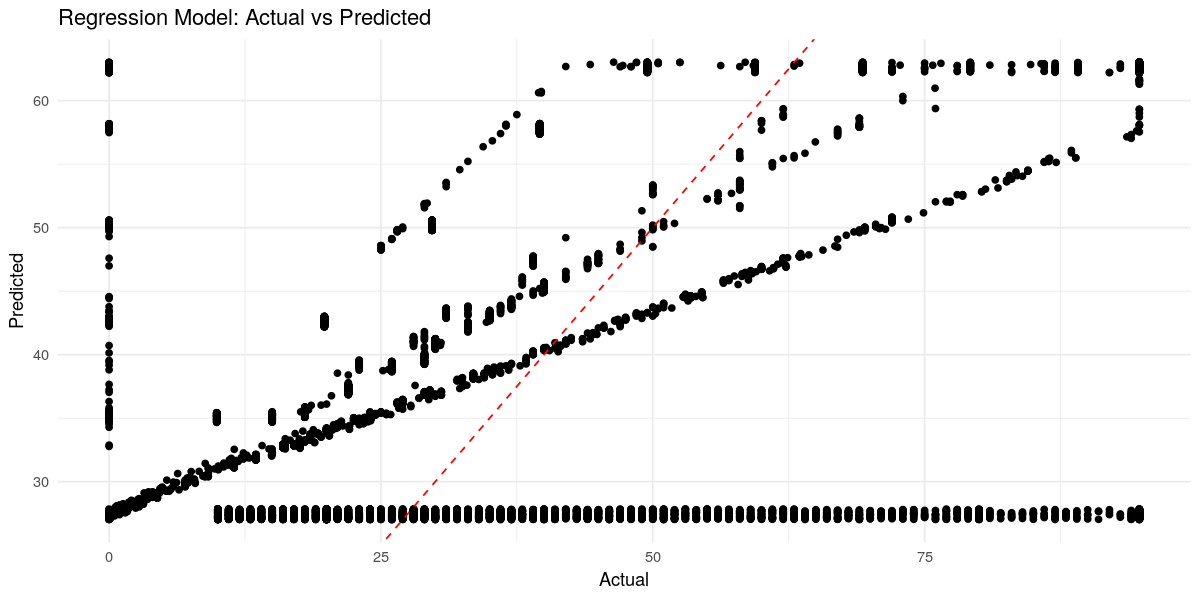

In [421]:
# Create a data frame with the actual and predicted values
plot_data <- data.frame(Actual = test_data$net_sales, Predicted = predictions)

# Create a scatter plot
ggplot(plot_data, aes(x = Actual, y = Predicted)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
    labs(x = "Actual", y = "Predicted", title = "Regression Model: Actual vs Predicted") +
    theme_minimal()

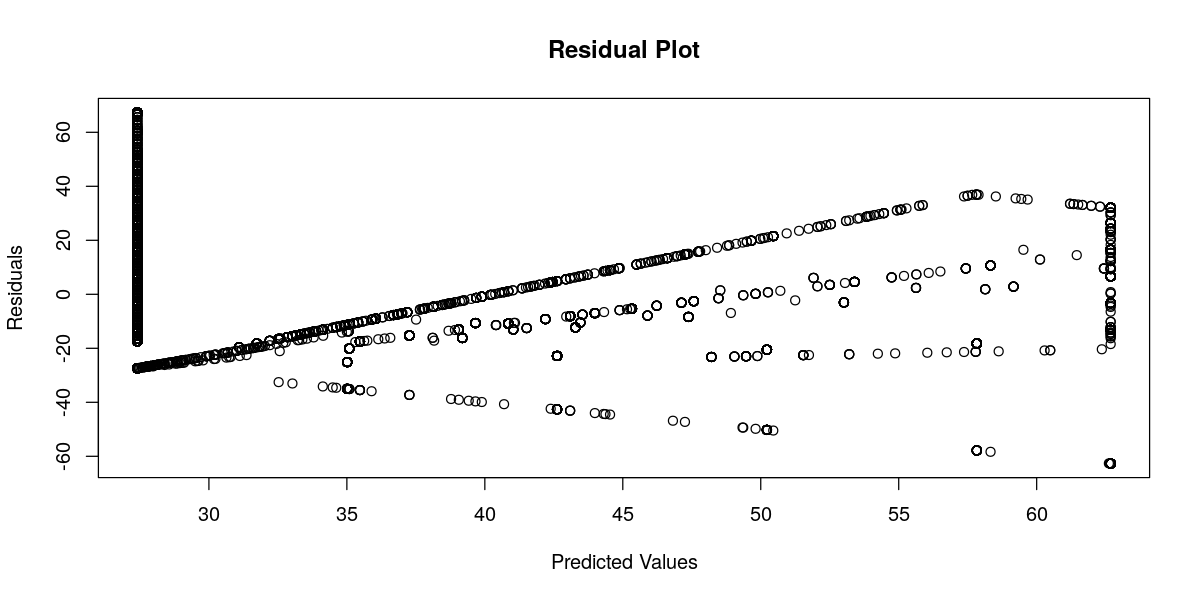

In [373]:
# Generate residuals
residuals <- test_data$net_sales - predictions

# Plot residuals
plot(predictions, residuals, xlab = "Predicted Values", ylab = "Residuals", main = "Residual Plot")

## 5. Modelo Regresion Lineal Múltiple

In [386]:
regresion_multiple_df <- read.csv("feature_regresion_lineal_multiple.csv")
head(regresion_multiple_df,1)

,id,age,agency_type,commision,distribution_channel,duration,gender,net_sales,claim,destination_category,⋯,product_namePremierPlan,product_nameRentalVehicleExcessInsurance,product_nameSilverPlan,product_nameSingleTripTravelProtectGold,product_nameSingleTripTravelProtectPlatinum,product_nameSingleTripTravelProtectSilver,product_nameSpouseorParentsComprehensivePlan,product_nameTicketProtector,product_nameTravelCruiseProtect,product_nameValuePlan
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,45341,3.367296,1,3.371769,2,3.555348,1,4.731803,1,1,⋯,0,0,1,0,0,0,0,0,0,0


In [424]:
# Cargar librería necesaria
library(caret)

# Separando datos entre entrenamiento y testeo
set.seed(200)
train_indices <- createDataPartition(regresion_multiple_df$net_sales, p = 0.8, list = FALSE)

# Eliminar la columna 'id' del conjunto de datos
regresion_multiple_df <- regresion_multiple_df[, !(names(regresion_multiple_df) %in% c("id"))]

train_data <- regresion_multiple_df[train_indices, ]
test_data <- regresion_multiple_df[-train_indices, ]

# Verificar que las variables predictoras no contengan valores faltantes y sean numéricas o factores
predictor_vars <- names(train_data)[-1]
valid_predictors <- sapply(train_data[predictor_vars], function(x) {
  !any(is.na(x)) && (is.numeric(x) || is.factor(x))
})
predictor_vars <- predictor_vars[valid_predictors]

# Crear una fórmula del modelo completo con todas las variables predictoras válidas
full_model_formula <- as.formula(paste("net_sales ~", paste(predictor_vars, collapse = " + ")))

# Crear el modelo inicial sin variables predictoras (solo intercepto)
model_forward <- lm(net_sales ~ 1, data = train_data)

# Realizar la selección hacia adelante utilizando step() sin mostrar los pasos intermedios
best_model_forward <- step(model_forward, 
                           scope = list(lower = formula(model_forward), upper = full_model_formula), 
                           direction = "forward", 
                           trace = 0) # 'trace = 0' para no mostrar los pasos intermedios

# Imprimir los resultados del mejor modelo
cat("Best Model Selected by Forward Selection:\n")
print(summary(best_model_forward))

Warning message in model.matrix.default(Terms, m, contrasts.arg = object$contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(Terms, m, contrasts.arg = object$contrasts):
“problem with term 6 in model.matrix: no columns are assigned”


Warning message in model.matrix.default(Terms, m, contrasts.arg = object$contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(Terms, m, contrasts.arg = object$contrasts):
“problem with term 6 in model.matrix: no columns are assigned”
Warning message in model.matrix.default(Terms, m, contrasts.arg = object$contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(Terms, m, contrasts.arg = object$contrasts):
“problem with term 7 in model.matrix: no columns are assigned”
Warning message in model.matrix.default(Terms, m, contrasts.arg = object$contrasts):
“the response appeared on the right-hand side and was dropped”
Warning message in model.matrix.default(Terms, m, contrasts.arg = object$contrasts):
“problem with term 8 in model.matrix: no columns are assigned”
Warning message in model.matrix.default(Terms, m, contrasts.arg = object$contrasts):
“the response appeared on t

Best Model Selected by Forward Selection:

Call:
lm(formula = net_sales ~ commision + agencyEPX + agencyCWT + 
    product_name2wayComprehensivePlan + agencyTTW + agencyC2B + 
    duration + agencyLWC + product_name1wayComprehensivePlan + 
    product_nameAnnualGoldPlan + agencyADM + claim + agencyRAB + 
    product_nameAnnualSilverPlan + product_nameAnnualTravelProtectPlatinum + 
    product_nameBronzePlan + product_nameAnnualTravelProtectSilver + 
    product_nameAnnualTravelProtectGold + agencyCBH + product_name24Protect + 
    product_nameValuePlan + agencyJWT + distribution_channel, 
    data = train_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4580 -0.2520  0.0396  0.2356  1.7448 

Coefficients:
                                         Estimate Std. Error t value Pr(>|t|)
(Intercept)                              1.017240   0.052526  19.366  < 2e-16
commision                                0.903906   0.007645 118.239  < 2e-16
agencyEPX                             

In [425]:
# Extract the variable names from the formula of the best model
variables_used <- attr(terms(best_model), "term.labels")

# Print the variables used
variables_used

[1] "age"                                       
 [2] "agency_type"                               
 [3] "commision"                                 
 [4] "distribution_channel"                      
 [5] "duration"                                  
 [6] "gender"                                    
 [7] "net_sales"                                 
 [8] "claim"                                     
 [9] "destination_category"                      
[10] "agencyADM"                                 
[11] "agencyART"                                 
[12] "agencyC2B"                                 
[13] "agencyCBH"                                 
[14] "agencyCCR"                                 
[15] "agencyCSR"                                 
[16] "agencyCWT"                                 
[17] "agencyEPX"                                 
[18] "agencyJWT"                                 
[19] "agencyJZI"                                 
[20] "agencyKML"                                 
[21] "agencyLWC"                                 
[22] "agencyRAB"                                 
[23] "agencySSI"                                 
[24] "agencyTST"                                 
[25] "agencyTTW"                                 
[26] "product_name1.way.Comprehensive.Plan"      
[27] "product_name2.way.Comprehensive.Plan"      
[28] "product_name24.Protect"                    
[29] "product_nameAnnual.Gold.Plan"              
[30] "product_nameAnnual.Silver.Plan"            
[31] "product_nameAnnual.Travel.Protect.Gold"    
[32] "product_nameAnnual.Travel.Protect.Platinum"
[33] "product_nameAnnual.Travel.Protect.Silver"  
[34] "product_nameBasic.Plan"                    
[35] "product_nameBronze.Plan"

In [426]:
length(variables_used)

[1] 35

In [427]:
# Realizando predicciones con la data de prueba
predictions_multiple <- predict(best_model_forward, newdata = test_data)

# Evaluate the model
mse_multiple <- mean((predictions_multiple - test_data$net_sales)^2)
rmse_multiple <- sqrt(mse_multiple)
r_squared_multiple <- cor(predictions_multiple, test_data$net_sales)^2

# Print the evaluation metrics
cat("Mean Squared Error (MSE):", mse_multiple, "\n")
cat("Root Mean Squared Error (RMSE):", rmse_multiple, "\n")
cat("R-squared:", r_squared_multiple, "\n")

Mean Squared Error (MSE): 0.3374854 
Root Mean Squared Error (RMSE): 0.5809349 
R-squared: 0.4730903 


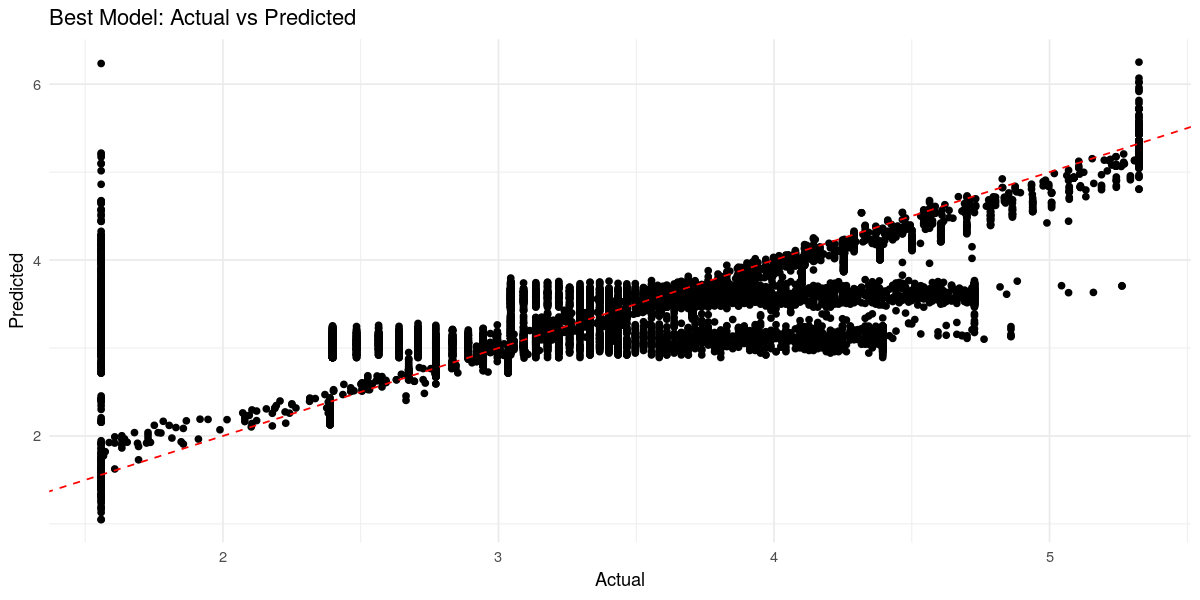

In [428]:
# Generate predictions for the test data using the best model
predictions <- predict(best_model_forward, newdata = test_data)

# Create a data frame with the actual and predicted values
plot_data <- data.frame(Actual = test_data$net_sales, Predicted = predictions)

# Create a scatter plot
ggplot(plot_data, aes(x = Actual, y = Predicted)) +
    geom_point() +
    geom_abline(intercept = 0, slope = 1, color = "red", linetype = "dashed") +
    labs(x = "Actual", y = "Predicted", title = "Best Model: Actual vs Predicted") +
    theme_minimal()

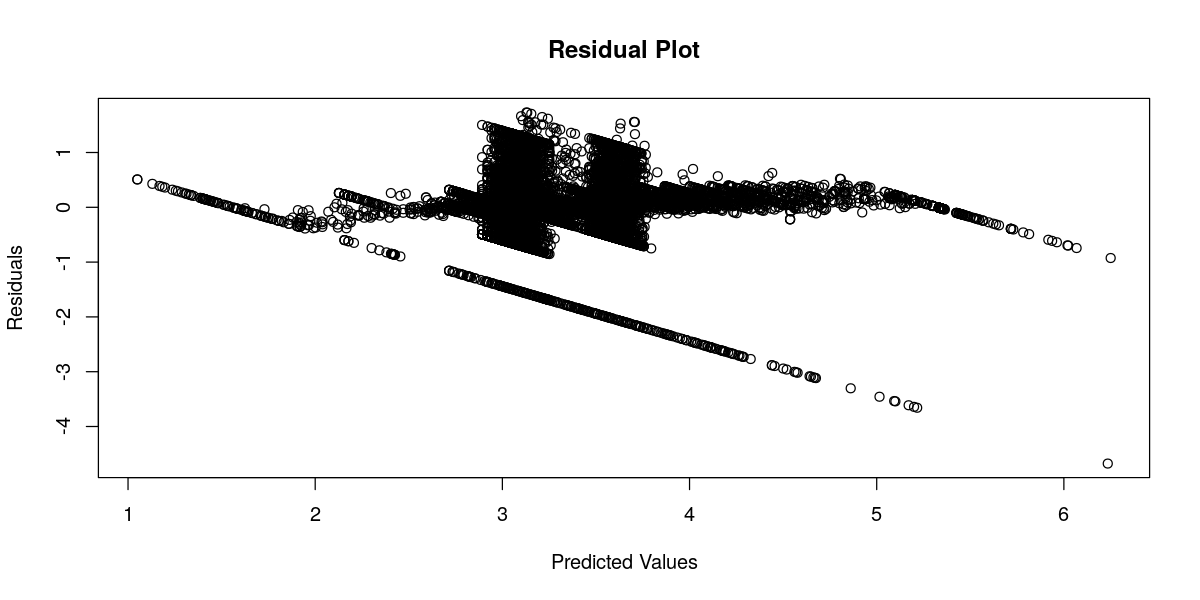

In [429]:
# Generate residuals
residuals <- test_data$net_sales - predictions

# Plot residuals
plot(predictions, residuals, xlab = "Predicted Values", ylab = "Residuals", main = "Residual Plot")

## 6. Modelo Regresion Logarítmica

para este apartado, y dada que las distribuciones de los datos numericos difiere demasiado, vamos a ajustar estos. Además de balancear los datos 

In [381]:
regresion_logaritmica_df <- read.csv("feature_regresion_logaritmica.csv")
head(regresion_logaritmica_df,1)

,id,age,agency_type,commision,distribution_channel,duration,gender,net_sales,claim,destination_category,⋯,product_namePremierPlan,product_nameRentalVehicleExcessInsurance,product_nameSilverPlan,product_nameSingleTripTravelProtectGold,product_nameSingleTripTravelProtectPlatinum,product_nameSingleTripTravelProtectSilver,product_nameSpouseorParentsComprehensivePlan,product_nameTicketProtector,product_nameTravelCruiseProtect,product_nameValuePlan
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,45341,3.367296,1,3.371769,2,3.555348,1,4.731803,1,1,⋯,0,0,1,0,0,0,0,0,0,0
